# Exploring data

Retrieving datasets, filtering, pivoting and merging

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
pd.options.display.max_columns = None

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

## Merging happiness datasets from years 2015-2019

Since the different csv for the different years have different column names, made a dictionary to connect the correct ones

In [2]:
column_dict = {"Happiness.Rank" : "Happiness Rank",
               "Overall rank" : "Happiness Rank",
               "Country or region" : "Country",
               "Happiness.Score" : "Happiness Score",
               "Score" : "Happiness Score",
               "Economy (GDP per Capita)" : "GDP",
               "Economy..GDP.per.Capita." : "GDP",
               "GDP per capita" : "GDP",
               "Health (Life Expectancy)" : "Life expectancy",
               "Health..Life.Expectancy." : "Life expectancy",
               "Healthy life expectancy" : "Life expectancy",
               "Trust (Government Corruption)" : "Corruption",
               "Trust..Government.Corruption." : "Corruption",
               "Perceptions of corruption" : "Corruption"
              }

Then, retrieve all 5 datasets and concat them in to one `happiness` dataframe

In [3]:
years = range(2015, 2020)

ind_years = []
columns_to_keep = ["Country", "Year", "Happiness Rank", "Happiness Score", "GDP", "Life expectancy", "Corruption"]

for year in years:
    path = "../data/worldhappiness/" + str(year) + ".csv"
    df = pd.read_csv(path)
    df.rename(columns=column_dict, inplace=True)
    df["Year"] = year
    df = df[columns_to_keep]
    ind_years.append(df)
    
happiness = pd.concat(ind_years, ignore_index=True)

And that's all we need to do for now with the happiness data

In [4]:
happiness.head() 

,Country,Year,Happiness Rank,Happiness Score,GDP,Life expectancy,Corruption
0,Switzerland,2015,1,7.587,1.39651,0.94143,0.41978
1,Iceland,2015,2,7.561,1.30232,0.94784,0.14145
2,Denmark,2015,3,7.527,1.32548,0.87464,0.48357
3,Norway,2015,4,7.522,1.45900,0.88521,0.36503
4,Canada,2015,5,7.427,1.32629,0.90563,0.32957


In [5]:
# save the happiness file to pickle as well
happiness.to_pickle('../data/happiness.pkl')

## Preparing SGD Data

First, read in the excel sheet for the SGD data

In [6]:
sgd_df = pd.read_excel("../data/sdgindicators/data.xlsx")
sgd_df.head()

,setting,date,source,indicator_abbr,indicator_name,dimension,subgroup,estimate,se,ci_lb,ci_ub,population,flag,setting_average,iso3,favourable_indicator,indicator_scale,ordered_dimension,subgroup_order,reference_subgroup,whoreg6,wbincome2023,dataset_id,update
0,Afghanistan,2000,UN SDG Indicators Database,SI_POV_EMP1,1.1.1 Employed population below international ...,Age (2 groups) (15-25+),15-24 years,66.300003,NaN,NaN,NaN,NaN,"Source = ILO modelled estimates, November 2021...",66.300003,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,rep_sdg,24 March 2023
1,Afghanistan,2000,UN SDG Indicators Database,SI_POV_EMP1,1.1.1 Employed population below international ...,Age (2 groups) (15-25+),25+ years,66.300003,NaN,NaN,NaN,NaN,"Source = ILO modelled estimates, November 2021...",66.300003,AFG,0,100,0,0,1,Eastern Mediterranean,Low income,rep_sdg,24 March 2023
2,Afghanistan,2000,UN SDG Indicators Database,SI_POV_EMP1,1.1.1 Employed population below international ...,Sex,Female,71.599998,NaN,NaN,NaN,NaN,"Source = ILO modelled estimates, November 2021...",66.300003,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,rep_sdg,24 March 2023
3,Afghanistan,2000,UN SDG Indicators Database,SI_POV_EMP1,1.1.1 Employed population below international ...,Sex,Male,65.400002,NaN,NaN,NaN,NaN,"Source = ILO modelled estimates, November 2021...",66.300003,AFG,0,100,0,0,1,Eastern Mediterranean,Low income,rep_sdg,24 March 2023
4,Afghanistan,2001,UN SDG Indicators Database,SI_POV_EMP1,1.1.1 Employed population below international ...,Age (2 groups) (15-25+),15-24 years,66.900002,NaN,NaN,NaN,NaN,"Source = ILO modelled estimates, November 2021...",66.900002,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,rep_sdg,24 March 2023


Then we check the column names and make a list for the indicators we're interested in

In [7]:
interesting_indicators = [
    "1.1.1 Employed population below international poverty line (%)",
    "1.1.1 Employed population below international poverty line (%) - Female",
    "1.1.1 Employed population below international poverty line (%) - Male",
    "1.1.1 Population below international poverty line (%)",
    '3.4.2 Suicide mortality rate (deaths per 100 000 population)',
    '4.1.2 Completion rate (%)',
    '4.1.2 Completion rate (%) - Lower secondary education',
    '4.1.2 Completion rate (%) - Primary education',
    '4.1.2 Completion rate (%) - Upper secondary education',
    '8.5.2 Unemployment rate (%)',
    '8.5.2 Unemployment rate (%) - Female',
    '8.5.2 Unemployment rate (%) - Male',
]

columns_keep = [
    'setting', 
    'date',
    'indicator_name',
    'dimension', 
    'subgroup', 
    'estimate',
    'setting_average',
    'indicator_scale'
]

Then we filter for the years 2015-2019, since that matches our happiness dataset, and filter only the indicators and columns we want

In [8]:
sgd_df.columns

Index(['setting', 'date', 'source', 'indicator_abbr', 'indicator_name',
       'dimension', 'subgroup', 'estimate', 'se', 'ci_lb', 'ci_ub',
       'population', 'flag', 'setting_average', 'iso3', 'favourable_indicator',
       'indicator_scale', 'ordered_dimension', 'subgroup_order',
       'reference_subgroup', 'whoreg6', 'wbincome2023', 'dataset_id',
       'update'],
      dtype='object')

In [9]:
# filter out years and columns of interest
sgd = sgd_df[(sgd_df["date"] >= 2015) & 
             (sgd_df["date"] <= 2019) & 
             (sgd_df["indicator_name"].isin(interesting_indicators))][columns_keep]

Since in the `estimate` column some values are from 0-100 and some from 0-10000, we normalize values depending on what is indicated in the `indicator_scale` column. Furthermore, rename some columns for better understandability

In [10]:
# normalize estimate based on indicator scale
sgd['value'] = sgd.apply(lambda row: (row['estimate'] / row['indicator_scale']) * 100, axis=1)
sgd['average'] = sgd.apply(lambda row: (row['setting_average'] / row['indicator_scale']) * 100, axis=1)
# drop non-normalizd columns
sgd_norm = sgd.drop(columns=["estimate", "setting_average", "indicator_scale", "dimension"])
# rename columns for convenience
sgd_norm.rename(columns={"setting" : "Country", 
                         "date" : "Year",
                         "indicator_name" : "Data"},
                inplace=True)
# display new head
sgd_norm.head()

,Country,Year,Data,subgroup,value,average
60,Afghanistan,2015,1.1.1 Employed population below international ...,15-24 years,46.000000,43.700001
61,Afghanistan,2015,1.1.1 Employed population below international ...,25+ years,42.799999,43.700001
62,Afghanistan,2015,1.1.1 Employed population below international ...,Female,50.700001,43.700001
63,Afghanistan,2015,1.1.1 Employed population below international ...,Male,42.099998,43.700001
64,Afghanistan,2016,1.1.1 Employed population below international ...,15-24 years,45.099998,42.700001


Now, the average value is stored in a different column, but we want to move that into a distinct subgroup and also store it into the `value` column. We create a new dataframe with one row for each group of data, and then concat that to the original, resulting in a cleaner dataframe

In [11]:
# Create a new DataFrame to store the results
average_sgd = pd.DataFrame()

# Create new rows with average stores in "value" column
for group, group_df in sgd_norm.groupby(['Country', 'Year', 'Data']):
    if 'average' not in group_df['subgroup'].values:
        new_row = group_df.iloc[0].copy()
        new_row['subgroup'] = 'average'
        new_row['value'] = new_row['average']
        average_sgd = pd.concat([average_sgd, new_row.to_frame().T], ignore_index=True)

# Concatenate with original and sort
sgd_w_average = pd.concat([sgd_norm, average_sgd], ignore_index=True)
sgd_w_average = sgd_w_average.sort_values(by=['Country', 'Year', 'Data', 'subgroup']).reset_index(drop=True)

# Drop average column
sgd_w_average.drop(columns="average", inplace=True)

sgd_w_average.head()

,Country,Year,Data,subgroup,value
0,Afghanistan,2015,1.1.1 Employed population below international ...,15-24 years,46.0
1,Afghanistan,2015,1.1.1 Employed population below international ...,25+ years,42.799999
2,Afghanistan,2015,1.1.1 Employed population below international ...,Female,50.700001
3,Afghanistan,2015,1.1.1 Employed population below international ...,Male,42.099998
4,Afghanistan,2015,1.1.1 Employed population below international ...,average,43.700001


Now we want to move the data description from the "Data" column, and pivot the table so that we have a column for each data type

In [12]:
pivot_df = sgd_w_average.pivot_table(
    index=['Country', 'Year'],
    columns=['Data', 'subgroup'],
    values=['value'],
    aggfunc='first'  # Use 'first' to handle duplicate entries, if any
).reset_index()

pivot_df.head()

Country  Year  \
Data                          
subgroup                      
0         Afghanistan  2015   
1         Afghanistan  2016   
2         Afghanistan  2017   
3         Afghanistan  2018   
4         Afghanistan  2019   

                                                                  value  \
Data     1.1.1 Employed population below international poverty line (%)   
subgroup                                                    15-24 years   
0                                                 46.000000               
1                                                 45.099998               
2                                                 43.900002               
3                                                 43.400002               
4                                                 42.700001               

                                                      \
Data                                                   
subgroup  25+ years     Female       Male    average   
0         42.799999  50.700001  42.099998  43.700001   
1         41.700001  49.500000  41.000000  42.700001   
2         40.200001  48.000000  39.500000  41.299999   
3         39.400002  47.400002  38.799999  40.599998   
4         38.599998  46.599998  38.000000  39.799999   

                                                                                  \
Data     1.1.1 Employed population below international poverty line (%) - Female   
subgroup                                                             15-24 years   
0                                                 50.500000                        
1                                                 49.500000                        
2                                                 48.099998                        
3                                                 47.500000                        
4                                                 46.799999                        

                                \
Data                             
subgroup  25+ years    average   
0         50.799999  50.700001   
1         49.599998  49.500000   
2         48.000000  48.000000   
3         47.299999  47.400002   
4         46.500000  46.599998   

                                                                                \
Data     1.1.1 Employed population below international poverty line (%) - Male   
subgroup                                                           15-24 years   
0                                                 44.799999                      
1                                                 43.900002                      
2                                                 42.599998                      
3                                                 42.099998                      
4                                                 41.400002                      

                                \
Data                             
subgroup  25+ years    average   
0         41.099998  42.099998   
1         39.799999  41.000000   
2         38.299999  39.500000   
3         37.500000  38.799999   
4         36.599998  38.000000   

                                                                          \
Data     1.1.1 Population below international poverty line (%)             
subgroup                                           15-64 years 65+ years   
0                                                       NaN          NaN   
1                                                       NaN          NaN   
2                                                       NaN          NaN   
3                                                       NaN          NaN   
4                                                       NaN          NaN   

                                                    \
Data                                                 
subgroup <15 years Female Male Rural Urban average   
0              NaN    NaN  NaN   NaN   NaN     NaN   
1             

# Merging both Datasets

Firstly, we check if the countries roughly align

In [13]:
hap_countries = set(happiness["Country"])
sgd_countries = set(pivot_df["Country"])
print(len(hap_countries))
print(len(sgd_countries))

len(hap_countries.intersection(sgd_countries))
print(hap_countries.difference(sgd_countries), "\n")
print(sgd_countries.difference(hap_countries))

170
190
{'Somaliland region', 'Laos', 'United Kingdom', 'United States', 'South Korea', 'Kosovo', 'Iran', 'Taiwan Province of China', 'Congo (Kinshasa)', 'North Cyprus', 'Moldova', 'Trinidad & Tobago', 'Bolivia', 'Syria', 'Congo (Brazzaville)', 'Tanzania', 'Hong Kong', 'Venezuela', 'Vietnam', 'Macedonia', 'Swaziland', 'Northern Cyprus', 'Hong Kong S.A.R., China', 'Russia', 'Palestinian Territories', 'Somaliland Region', 'Taiwan', 'Ivory Coast', 'Turkey', 'Netherlands', 'Czech Republic'} 

{'Micronesia (Federated States of)', 'Cook Islands', 'United Republic of Tanzania', 'Guyana', 'Marshall Islands', 'Maldives', 'Cuba', 'Grenada', 'Barbados', 'The United Kingdom', "Lao People's Democratic Republic", 'Tonga', 'Republic of Moldova', 'Vanuatu', 'Sao Tome and Principe', 'Cabo Verde', 'Iran (Islamic Republic of)', 'Türkiye', 'Fiji', 'Syrian Arab Republic', 'Bahamas', 'Seychelles', 'Antigua and Barbuda', "Côte d'Ivoire", 'Solomon Islands', 'Tuvalu', 'United States of America', 'Republic of K

We can fix some by renaming the countries in the sgd dataset

In [14]:
sgd_country_rename = {
    'Eswatini':'Swaziland',
    "Lao People's Democratic Republic":"Laos",
    'United States of America':'United States',
    'The United Kingdom':'United Kingdom',
    'Czechia':'Czech Republic',
    'Netherlands (Kingdom of the)':'Netherlands',
    "Viet nam" : "Vietnam",
    'Russian Federation' : 'Russia',
    "Republic of Moldova" : 'Moldova',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Republic of Korea': 'South Korea',
    'Iran (Islamic Republic of)': 'Iran',
    'Syrian Arab Republic': 'Syria',
    'Türkiye':'Turkey',
    'United Republic of Tanzania': 'Tanzania',
    'occupied Palestinian territory':'Palestinian Territories',
    'Congo':'Congo (Brazzaville)',
    'Democratic Republic of the Congo':'Congo (Kinshasa)',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    
}

In [15]:
# replace names in SGD dataset
pivot_df['Country'] = pivot_df['Country'].replace(sgd_country_rename)

hap_countries = set(happiness["Country"])
sgd_countries = set(pivot_df["Country"])
print(len(hap_countries))
print(len(sgd_countries))
print(len(hap_countries.intersection(sgd_countries)))

170
190
157


So there are `157` countries that are present in both datasets

Now, we can merge the datasets on year and country

In [16]:
combined = pd.merge(happiness, pivot_df, on=['Country', 'Year'], how="inner").sort_values(by=['Country', 'Year']).reset_index(drop=True)
print(combined.iloc[9:15])

    Country  Year  Happiness Rank  Happiness Score       GDP  Life expectancy  \
9   Albania  2019             107            4.719  0.947000         0.874000   
10  Algeria  2015              68            5.605  0.939290         0.617660   
11  Algeria  2016              38            6.355  1.052660         0.618040   
12  Algeria  2017              53            5.872  1.091864         0.617585   
13  Algeria  2018              84            5.295  0.979000         0.687000   
14  Algeria  2019              88            5.211  1.002000         0.785000   

    Corruption  \
9     0.027000   
10    0.173830   
11    0.161570   
12    0.146096   
13    0.135000   
14    0.114000   

    (value, 1.1.1 Employed population below international poverty line (%), 15-24 years)  \
9                                                 0.8                                      
10                                                0.1                                      
11                           

And we get the full dataset, which we will merge to pickle for easy use.

To read it back later, use `df = pd.read_pickle('../data/combined_df.pkl')`

In [17]:
import pickle

combined.to_pickle('../data/combined_df.pkl')

In [18]:
df = pd.read_pickle('../data/combined_df.pkl')

There is a lot of missing data for each year in most of the countries so we decided to drop some of those countries and keep the ones that contain most of the data.
Later on we could also go back to some of the countries, some of them are countries that are labaled as underdeveloped so the lack of information on indicators such as `4.1.2 Completion rate (%)` or `8.5.2 Unemployment rate (%) - Male, Persons with disability` is understandable. This knowledge could also explain the `happiness rating` that has been assigned to those countries. 

In [19]:
columns_to_check_nan = df.columns[7:]

for country in df['Country'].unique():
    nan_data = df.loc[df['Country'] == country, columns_to_check_nan].isnull().sum()
    nan_columns = nan_data[nan_data > 0].index
    
    if not nan_columns.empty:
        #print(f"Country: {country}")
        for column in nan_columns:
            nan_years = df.loc[(df['Country'] == country) & df[column].isnull(), 'Year'].tolist()
            nan_count = nan_data[column]
            #print(f"  - Column with NaN: {column}")
            #print(f"    - Number of NaN values: {nan_count}")

Decided to drop, for now, the columns that belong to the Indicator `Employed population below international poverty line (%)` since we can analyze the poverty rate (%) and then break it down for further analysis with the `Unemplyment rate`

In [20]:
employed_poverty_rate = df.filter(like='Employed').columns

df.drop(columns=employed_poverty_rate, inplace=True)

Decided to look into the columns that have the most missing data out of all the indicators.
There seems to be a lot of missing data (more than half) in the suicide mortality rate so I want to check next if this corresponds to every year for every country or if this is data that was not taken in consideration over previous years. 
If this would be the case we would take into consideration the years were the suicide mortality rate was present since we believe this would have a big impact when rating the happiness in a country.

In [21]:
group_indicators = ['1.1.1', '3.4.2', '4.1.2', '8.5.2']

for indicator in group_indicators:
    columns = df.filter(like=indicator).columns
    nan_counts = df[columns].isna().sum().sort_values(ascending=False)
    
    top_5_group = nan_counts.head(5)
    
    print(f"\nTop 5 columns with the highest number of NaN values in Group {indicator}:")
    print(top_5_group)


Top 5 columns with the highest number of NaN values in Group 1.1.1:
(value, 1.1.1 Population below international poverty line (%), Rural)          466
(value, 1.1.1 Population below international poverty line (%), Urban)          456
(value, 1.1.1 Population below international poverty line (%), 15-64 years)    447
(value, 1.1.1 Population below international poverty line (%), <15 years)      446
(value, 1.1.1 Population below international poverty line (%), 65+ years)      445
dtype: int64

Top 5 columns with the highest number of NaN values in Group 3.4.2:
(value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), Female)     447
(value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), Male)       447
(value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), average)    447
dtype: int64

Top 5 columns with the highest number of NaN values in Group 4.1.2:
(value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 4)              614
(v

In [22]:
group_patterns = ['1.1.1', '3.4.2', '4.1.2', '8.5.2']

for group_pattern in group_patterns:
    group_columns = df.filter(like=group_pattern).columns
    
    countries_with_no_missing_data = []

    for country in df['Country'].unique():
        years_with_no_missing_data = df.loc[df['Country'] == country, ['Year'] + list(group_columns)].dropna()

        if not years_with_no_missing_data.empty:
            countries_with_no_missing_data.append((country, years_with_no_missing_data['Year'].tolist()))

    #print(f"Countries with no missing data for any year in Group {group_pattern}:\n")
    #for country, no_missing_years in countries_with_no_missing_data:
        #print(f"- {country}: Years with no missing data: {no_missing_years}")

# UNCOMMENT THE LINES ABOVE WHEN RUNNING THE FILE --> did this to avoid having an giant notebook for now

Most of the countries have data for year 2019. Therefore, we will focus on countries with the least NaN entries in the year 2019, to ensure maximum data availability. The countries are *Bolivia, Dominican Republic, Honduras, Thailand, and Zimbabwe*. 

In [23]:
df_2019  = df[df['Year']==2019]
nan_entries_by_country = df_2019.set_index('Country').isna().sum(axis=1).sort_values()
countries = nan_entries_by_country[:5].index.tolist()

selected_countries_df = df[(df['Country'].isin(countries)) & (df['Year'] == 2019)]
selected_countries_df

,Country,Year,Happiness Rank,Happiness Score,GDP,Life expectancy,Corruption,"(value, 1.1.1 Population below international poverty line (%), 15-64 years)","(value, 1.1.1 Population below international poverty line (%), 65+ years)","(value, 1.1.1 Population below international poverty line (%), <15 years)","(value, 1.1.1 Population below international poverty line (%), Female)","(value, 1.1.1 Population below international poverty line (%), Male)","(value, 1.1.1 Population below international poverty line (%), Rural)","(value, 1.1.1 Population below international poverty line (%), Urban)","(value, 1.1.1 Population below international poverty line (%), average)","(value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), Female)","(value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), Male)","(value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), average)","(value, 4.1.2 Completion rate (%), Lower secondary education)","(value, 4.1.2 Completion rate (%), Primary education)","(value, 4.1.2 Completion rate (%), Upper secondary education)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Female)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Male)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 1 (poorest))","(value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 2)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 3)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 4)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 5 (richest))","(value, 4.1.2 Completion rate (%) - Lower secondary education, Rural)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Urban)","(value, 4.1.2 Completion rate (%) - Lower secondary education, average)","(value, 4.1.2 Completion rate (%) - Primary education, Female)","(value, 4.1.2 Completion rate (%) - Primary education, Male)","(value, 4.1.2 Completion rate (%) - Primary education, Quintile 1 (poorest))","(value, 4.1.2 Completion rate (%) - Primary education, Quintile 2)","(value, 4.1.2 Completion rate (%) - Primary education, Quintile 3)","(value, 4.1.2 Completion rate (%) - Primary education, Quintile 4)","(value, 4.1.2 Completion rate (%) - Primary education, Quintile 5 (richest))","(value, 4.1.2 Completion rate (%) - Primary education, Rural)","(value, 4.1.2 Completion rate (%) - Primary education, Urban)","(value, 4.1.2 Completion rate (%) - Primary education, average)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Female)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Male)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 1 (poorest))","(value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 2)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 3)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 4)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 5 (richest))","(value, 4.1.2 Completion rate (%) - Upper secondary education, Rural)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Urban)","(value, 4.1.2 Completion rate (%) - Upper secondary education, average)","(value, 8.5.2 Unemployment rate (%), 15-24 years)","(value, 8.5.2 Unemployment rate (%), 25+ years)","(value, 8.5.2 Unemployment rate (%), Female)","(value, 8.5.2 Unemployment rate (%), Male)","(value, 8.5.2 Unemployment rate (%), Persons with disability)","(value, 8.5.2 Unemployment rate (%), Persons without disability)","(value, 8.5.2 Unemployment rate (%), average)","(value, 8.5.2 Unemployment rate (%) - Female, 15-24 years)","(value, 8.5.2 Unemployment rate (%) - Female, 25+ years)","(value, 8.5.2 Unemployment rate (%) - Female, Persons with disability)","(value, 8.5.2 Unemployment rate (%) - Female, Persons without disability)","(value, 8.5.2 Unemployment rate (%) - Female,

The narrowed down DataFrame have NaN values for Unemployment rate subgroups -- Persons with and without disability. Therefore, we remove these columns.

In [24]:
selected_countries_df = selected_countries_df.dropna(axis=1)
selected_countries_df

,Country,Year,Happiness Rank,Happiness Score,GDP,Life expectancy,Corruption,"(value, 1.1.1 Population below international poverty line (%), 15-64 years)","(value, 1.1.1 Population below international poverty line (%), 65+ years)","(value, 1.1.1 Population below international poverty line (%), <15 years)","(value, 1.1.1 Population below international poverty line (%), Female)","(value, 1.1.1 Population below international poverty line (%), Male)","(value, 1.1.1 Population below international poverty line (%), Rural)","(value, 1.1.1 Population below international poverty line (%), Urban)","(value, 1.1.1 Population below international poverty line (%), average)","(value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), Female)","(value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), Male)","(value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), average)","(value, 4.1.2 Completion rate (%), Lower secondary education)","(value, 4.1.2 Completion rate (%), Primary education)","(value, 4.1.2 Completion rate (%), Upper secondary education)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Female)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Male)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 1 (poorest))","(value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 2)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 3)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 4)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 5 (richest))","(value, 4.1.2 Completion rate (%) - Lower secondary education, Rural)","(value, 4.1.2 Completion rate (%) - Lower secondary education, Urban)","(value, 4.1.2 Completion rate (%) - Lower secondary education, average)","(value, 4.1.2 Completion rate (%) - Primary education, Female)","(value, 4.1.2 Completion rate (%) - Primary education, Male)","(value, 4.1.2 Completion rate (%) - Primary education, Quintile 1 (poorest))","(value, 4.1.2 Completion rate (%) - Primary education, Quintile 2)","(value, 4.1.2 Completion rate (%) - Primary education, Quintile 3)","(value, 4.1.2 Completion rate (%) - Primary education, Quintile 4)","(value, 4.1.2 Completion rate (%) - Primary education, Quintile 5 (richest))","(value, 4.1.2 Completion rate (%) - Primary education, Rural)","(value, 4.1.2 Completion rate (%) - Primary education, Urban)","(value, 4.1.2 Completion rate (%) - Primary education, average)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Female)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Male)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 1 (poorest))","(value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 2)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 3)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 4)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 5 (richest))","(value, 4.1.2 Completion rate (%) - Upper secondary education, Rural)","(value, 4.1.2 Completion rate (%) - Upper secondary education, Urban)","(value, 4.1.2 Completion rate (%) - Upper secondary education, average)","(value, 8.5.2 Unemployment rate (%), 15-24 years)","(value, 8.5.2 Unemployment rate (%), 25+ years)","(value, 8.5.2 Unemployment rate (%), Female)","(value, 8.5.2 Unemployment rate (%), Male)","(value, 8.5.2 Unemployment rate (%), average)","(value, 8.5.2 Unemployment rate (%) - Female, 15-24 years)","(value, 8.5.2 Unemployment rate (%) - Female, 25+ years)","(value, 8.5.2 Unemployment rate (%) - Female, average)","(value, 8.5.2 Unemployment rate (%) - Male, 15-24 years)","(value, 8.5.2 Unemployment rate (%) - Male, 25+ years)","(value, 8.5.2 Unemployment rate (%) - Male, average)"
81,Bolivia,2019,61,5.779,0.776,0.706,0.064,1.498560,0.311740,3.17435,1.81050,2.035030,5.581820,0.3

We see above, that subcategories of the same indicator are highly correlated (>0.84) to each other. Now we would like to explore the degree to which the indicators correlate with the Happiness Score.

In [25]:
def indicator_happiness_corr(indicator):
    ### To compute the correlation between columns of indicator and Hapiness Score
    columns = selected_countries_df.filter(like=indicator).columns.tolist()
    columns.append('Happiness Score')
    corr = selected_countries_df[columns].corr()
    return corr['Happiness Score'].sort_values()

The indicator '1.1.1 Population below international poverty line' has a strong negative correlation with Happiness. 

In [26]:
poverty_happiness_corr = indicator_happiness_corr('1.1.1')
print(poverty_happiness_corr)

(value, 1.1.1 Population below international poverty line (%), Female)        -0.916903
(value, 1.1.1 Population below international poverty line (%), 15-64 years)   -0.916595
(value, 1.1.1 Population below international poverty line (%), 65+ years)     -0.915446
(value, 1.1.1 Population below international poverty line (%), average)       -0.914332
(value, 1.1.1 Population below international poverty line (%), Male)          -0.911022
(value, 1.1.1 Population below international poverty line (%), Urban)         -0.909312
(value, 1.1.1 Population below international poverty line (%), <15 years)     -0.898732
(value, 1.1.1 Population below international poverty line (%), Rural)         -0.853324
Happiness Score                                                                1.000000
Name: Happiness Score, dtype: float64


Suicide morality rate also has a strong negative correlation to Hapiness. It is interesting to note that the suicide mortality rate of the Female population exhibits a stronger correlation to Hapiness, despite males having higher suicide mortality rates globally.

In [27]:
suicide_happiness_corr = indicator_happiness_corr('3.4.2')
print(suicide_happiness_corr)

(value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), Female)    -0.883781
(value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), average)   -0.786386
(value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), Male)      -0.703574
Happiness Score                                                                   1.000000
Name: Happiness Score, dtype: float64


The correlation between Happiness Scores and Completion rates are generally positive. The completion of upper secondary education of higher income quintiles shows the highest correlation with happiness, with correlation coefficients greater than 0.75. The completion of primary education in urban areas and among the richest quintile has almost no correlation, which may imply the prevalence of primary education among the rich, who tend to reside in urban areas. 

The completion of Primary education is rather unsignificant, apart from that in Quintile 4. Indicators of this income group may be a proxy for the income distribution equality of the country, as the living conditions of the two upper quintiles may differ significantly in countries with low income parity.

In [28]:
education_happiness_corr = indicator_happiness_corr('4.1.2')
print(education_happiness_corr)

(value, 4.1.2 Completion rate (%) - Primary education, Urban)                          -0.228458
(value, 4.1.2 Completion rate (%) - Primary education, Quintile 5 (richest))            0.036848
(value, 4.1.2 Completion rate (%) - Lower secondary education, Urban)                   0.253234
(value, 4.1.2 Completion rate (%) - Primary education, Female)                          0.388650
(value, 4.1.2 Completion rate (%) - Primary education, Quintile 1 (poorest))            0.399908
(value, 4.1.2 Completion rate (%) - Primary education, Rural)                           0.449977
(value, 4.1.2 Completion rate (%) - Primary education, Quintile 2)                      0.473035
(value, 4.1.2 Completion rate (%), Primary education)                                   0.482041
(value, 4.1.2 Completion rate (%) - Primary education, average)                         0.482041
(value, 4.1.2 Completion rate (%) - Lower secondary education, Male)                    0.510522
(value, 4.1.2 Completion rate 

Unemployment rates demonstrate the strongest correlation to Happiness, out of all the indicator groups. We see a clear trend of Male subcategories showing higher negative correlations (> -0.978), which may imply the prevalence of the 'male breadwinner' culture in the selected countries.

In [29]:
unemployment_happiness_corr = indicator_happiness_corr('8.5.2')
print(unemployment_happiness_corr)

(value, 8.5.2 Unemployment rate (%) - Male, 15-24 years)     -0.987197
(value, 8.5.2 Unemployment rate (%), Male)                   -0.981510
(value, 8.5.2 Unemployment rate (%) - Male, average)         -0.981510
(value, 8.5.2 Unemployment rate (%), 25+ years)              -0.978719
(value, 8.5.2 Unemployment rate (%) - Male, 25+ years)       -0.978639
(value, 8.5.2 Unemployment rate (%), average)                -0.971319
(value, 8.5.2 Unemployment rate (%), 15-24 years)            -0.958704
(value, 8.5.2 Unemployment rate (%) - Female, 25+ years)     -0.948589
(value, 8.5.2 Unemployment rate (%), Female)                 -0.920637
(value, 8.5.2 Unemployment rate (%) - Female, average)       -0.920637
(value, 8.5.2 Unemployment rate (%) - Female, 15-24 years)   -0.860065
Happiness Score                                               1.000000
Name: Happiness Score, dtype: float64


In [30]:
def make_corr_matrix(indicator, group_title, save_image: bool=False):
    """
    Create a correlation plot for a specified indicator and display correlation scores.
    """
    group_columns = selected_countries_df.filter(like=indicator).columns.to_list()
    group_columns.append('Happiness Score')
    group_df = selected_countries_df[group_columns]
    correlation_matrix = group_df.corr()

    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)
    ax.set_title(f'Correlation Matrix - {group_title}')

    if save_image:
        plt.savefig(f"../fig/correlation_plot_{group_title}.png")

    plt.show()

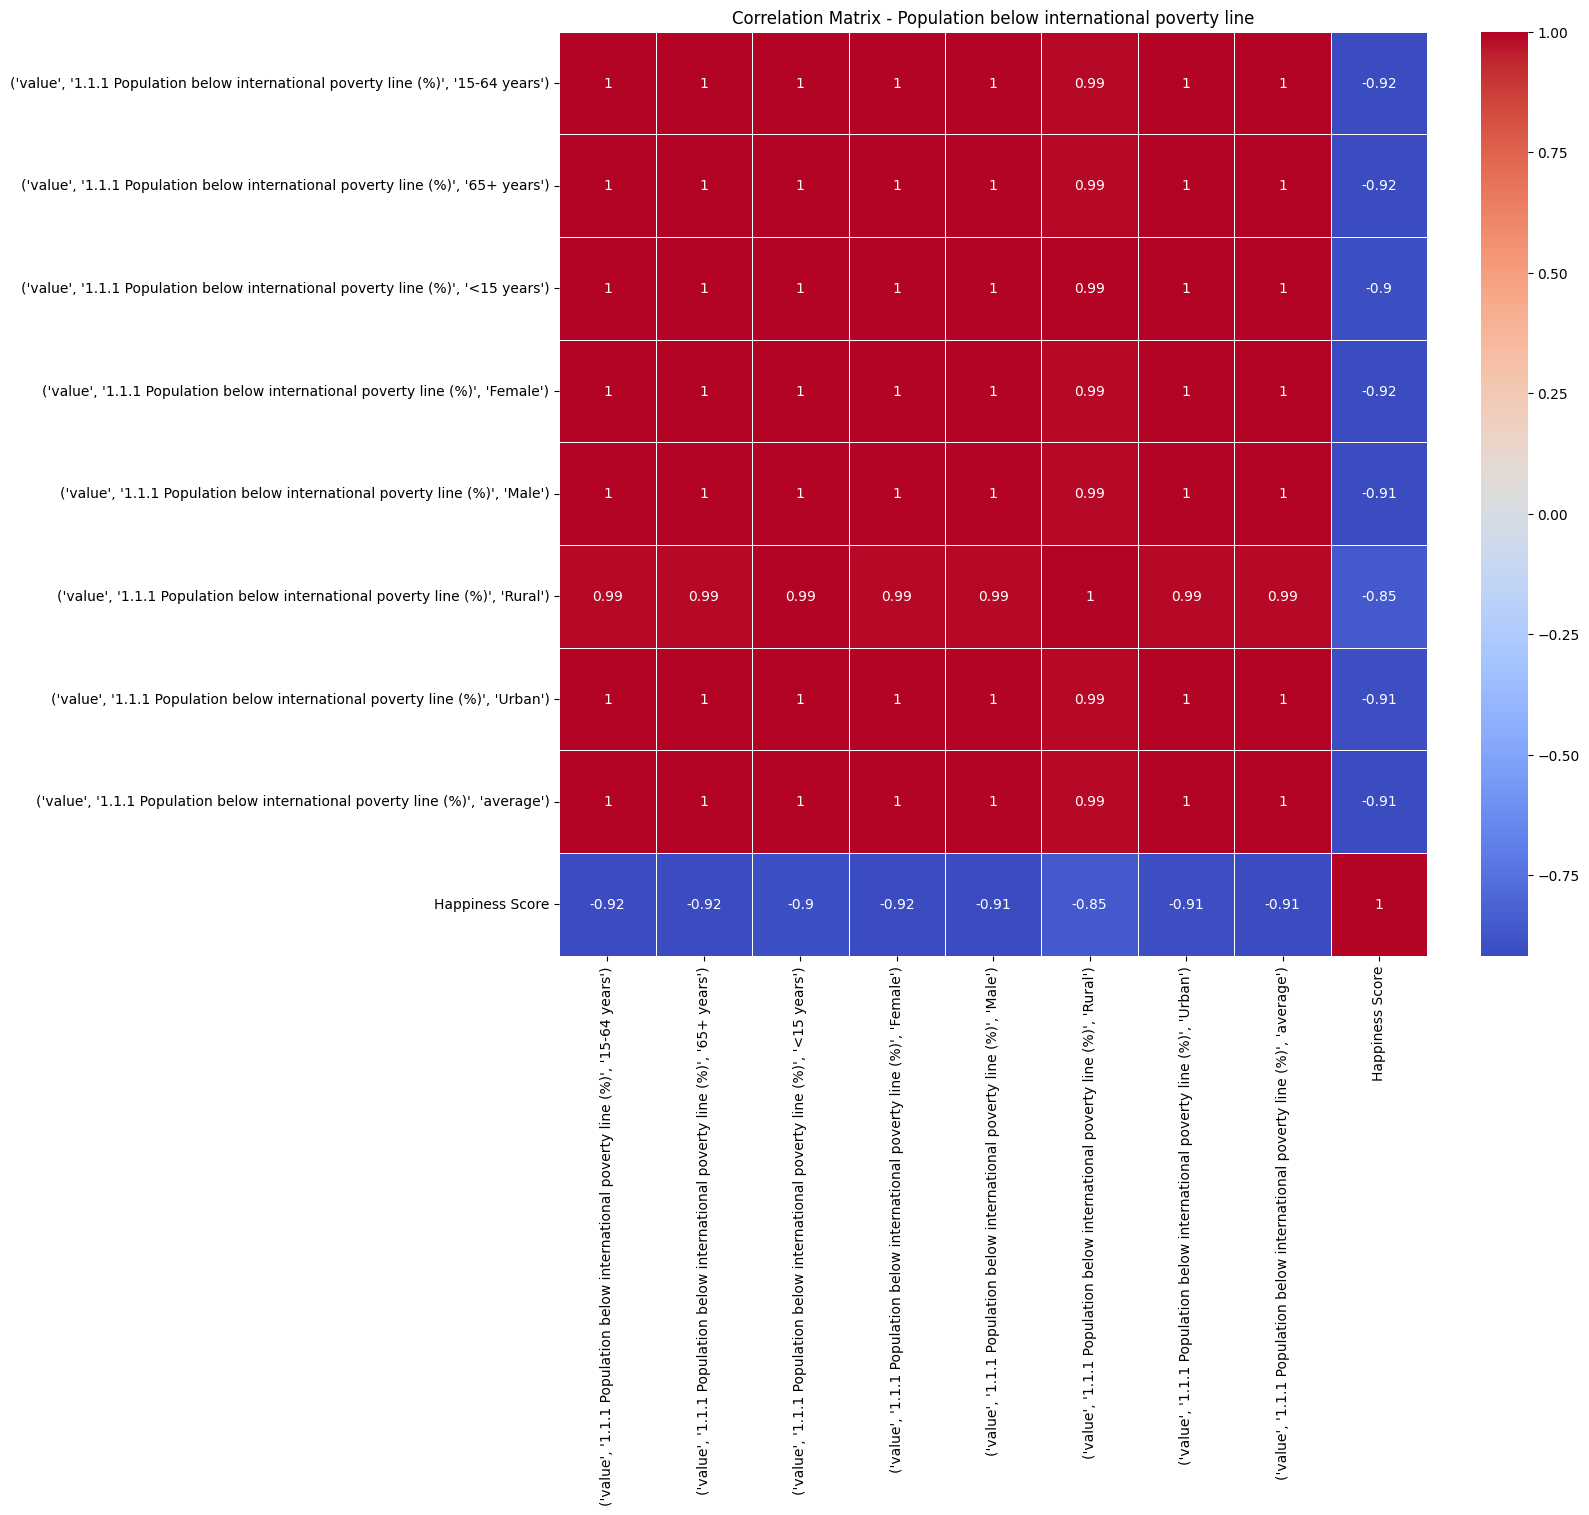

In [31]:
make_corr_matrix('1.1.1', 'Population below international poverty line', save_image=True)

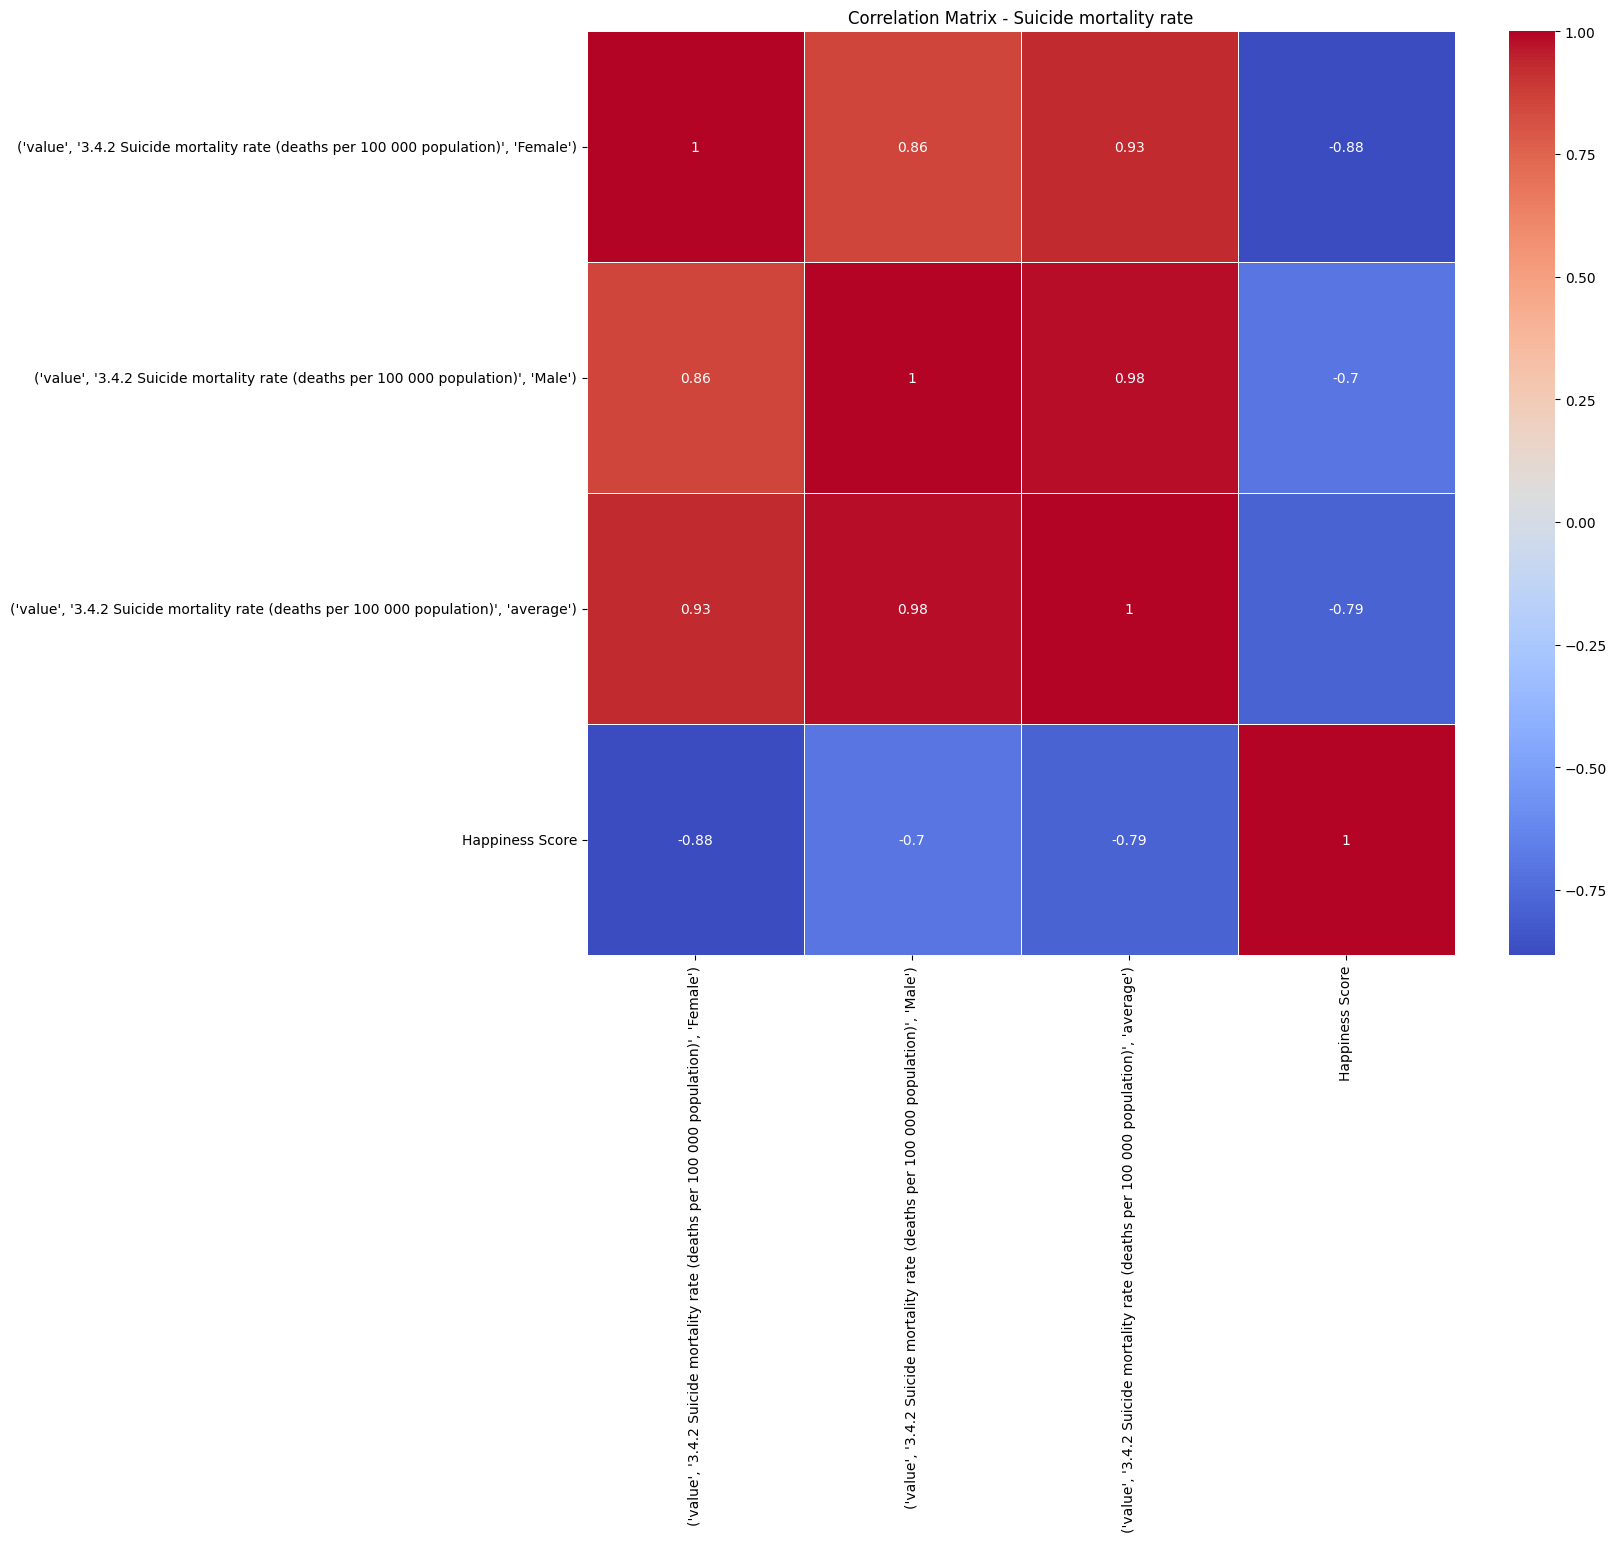

In [32]:
make_corr_matrix('3.4.2', 'Suicide mortality rate', save_image=True)

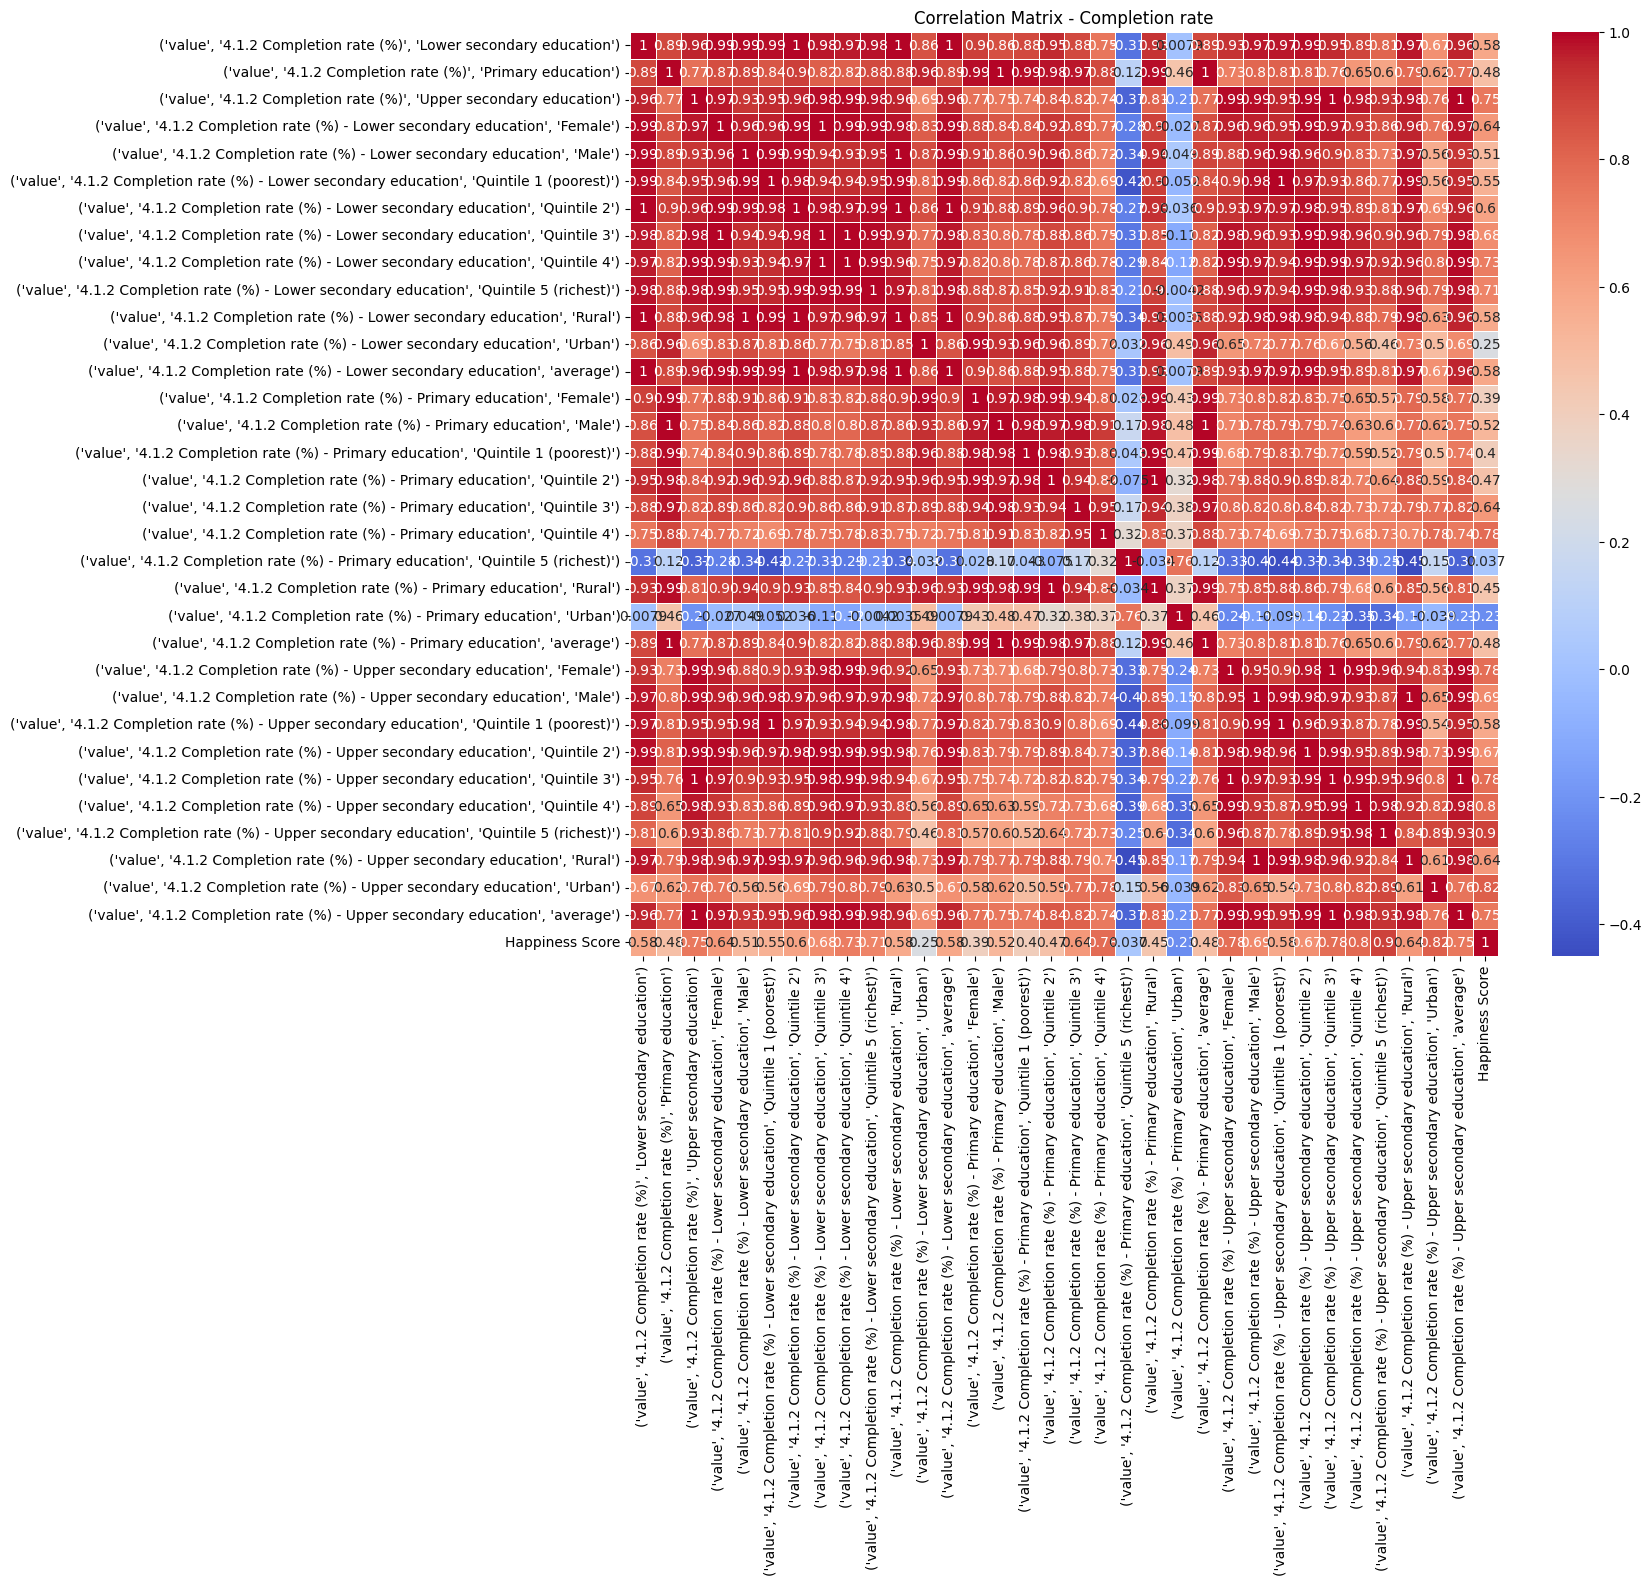

In [33]:
make_corr_matrix('4.1.2', 'Completion rate', save_image=True)

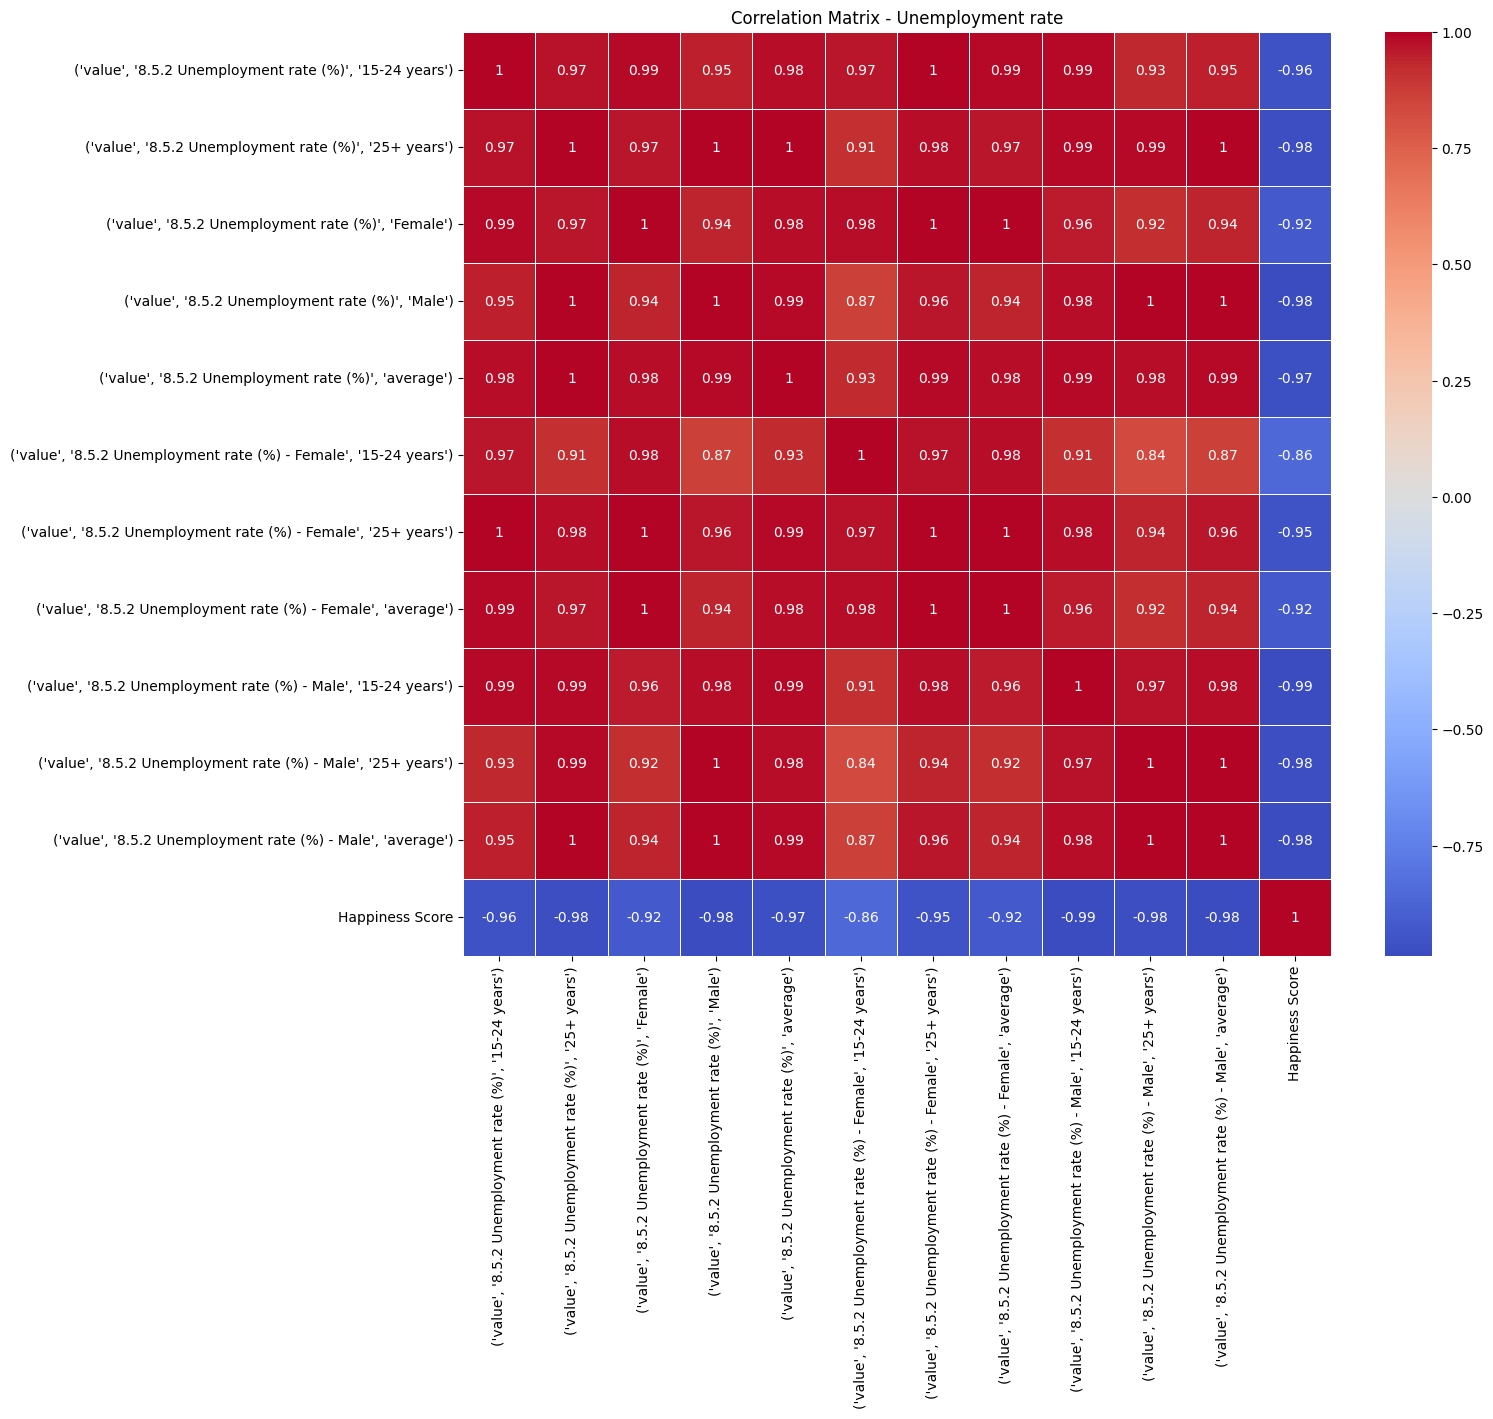

In [34]:
make_corr_matrix('8.5.2', 'Unemployment rate', save_image=True)

# Vizualizing worldwide correlations

In [35]:
df = pd.read_pickle('../data/combined_df.pkl')

In [36]:
df.columns = df.columns.map(lambda x: ", ".join(x) if isinstance(x, tuple) else x)

In [37]:
def make_corr_plot(df: pd.DataFrame, columns: [str], xlabel: str, ylabel: str, title: str, save: bool=False):
    """
    Makes correlation plot of specified columns and displays correlation score
    """
    # calculate correlation score
    filtered_df = df.dropna(subset=columns)
    
    correlation_coefficient = filtered_df[columns[0]].corr(filtered_df[columns[1]])

    # style choices
    sns.set_style("whitegrid") 
    sns.set_palette("deep")  
    plt.figure(figsize=(8, 6))
    
    # make reg plot
    sns.regplot(x=columns[0], y=columns[1], data=df, 
                scatter_kws={'s': 60, 'alpha': 0.6},
                line_kws={'color':'red'}
               )

    # annotate plot with correlation score
    plt.annotate(f'Correlation: {correlation_coefficient:.2f}', xy=(0.8, 0.85), xycoords='axes fraction', 
                 ha='center', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='steelblue', facecolor='white'))

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontweight="bold")
    
    if save:
        plt.savefig(f"../fig/scatter_plot_{title}.png")

    plt.show()

In [38]:
scatters = [df.columns[11], df.columns[25], df.columns[28], df.columns[30], df.columns[68]]
print(scatters)

['value, 1.1.1 Employed population below international poverty line (%), average', 'value, 1.1.1 Population below international poverty line (%), average', 'value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), average', 'value, 4.1.2 Completion rate (%), Primary education', 'value, 8.5.2 Unemployment rate (%), average']


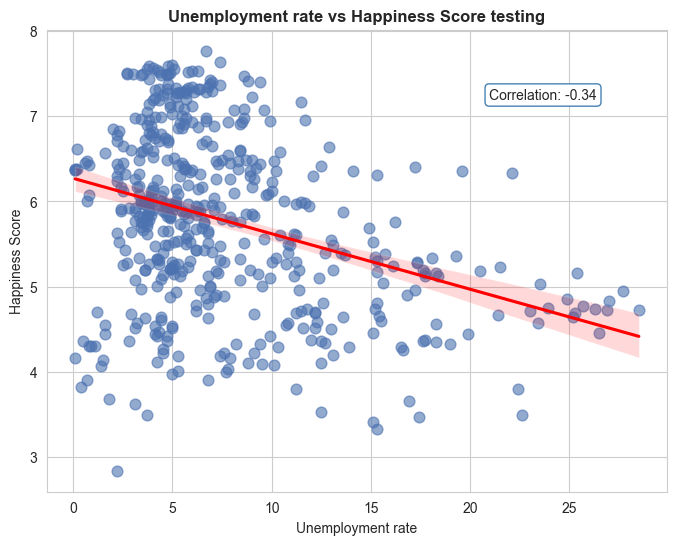

In [39]:
subset_to_scatter = [df.columns[68], df.columns[3]]

make_corr_plot(df, subset_to_scatter, "Unemployment rate", 
               "Happiness Score", 
               "Unemployment rate vs Happiness Score testing",
              save=True)

# Plotting general data on world map

To get an overview vizualization of the happiness scores, poverty rates, unemployment rates and suicide rates of all the countries in our dataset, we can plot them on a map of the world. For this, we use a geom shapefile from the `geopandas` dataset. We then merge this with our data so we can plot the results

In [40]:
import geopandas as gpd

countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


First, we check again the overlap in the countries columns:

In [41]:
hap_countries = set(happiness["Country"])
gpd_countries = set(countries["name"])
print(len(hap_countries))
print(len(gpd_countries))

print(len(hap_countries.intersection(gpd_countries)))
print(hap_countries.difference(gpd_countries), "\n")
print(gpd_countries.difference(hap_countries))

170
177
145
{'South Sudan', 'Somaliland region', 'United States', 'Bahrain', 'Taiwan Province of China', 'Congo (Kinshasa)', 'North Cyprus', 'Singapore', 'Trinidad & Tobago', 'Congo (Brazzaville)', 'Dominican Republic', 'Malta', 'Hong Kong', 'Macedonia', 'Swaziland', 'Northern Cyprus', 'Comoros', 'Hong Kong S.A.R., China', 'Palestinian Territories', 'Somaliland Region', 'Bosnia and Herzegovina', 'Ivory Coast', 'Mauritius', 'Central African Republic', 'Czech Republic'} 

{'Solomon Is.', 'Greenland', 'Guyana', 'Dominican Rep.', 'Cuba', 'Central African Rep.', 'North Korea', 'Bosnia and Herz.', 'Palestine', 'Vanuatu', 'Eq. Guinea', 'New Caledonia', 'Fiji', 'Dem. Rep. Congo', 'Bahamas', "Côte d'Ivoire", 'Somaliland', 'United States of America', 'Antarctica', 'Fr. S. Antarctic Lands', 'Falkland Is.', 'eSwatini', 'Brunei', 'Papua New Guinea', 'Guinea-Bissau', 'Congo', 'Eritrea', 'Timor-Leste', 'N. Cyprus', 'W. Sahara', 'S. Sudan', 'Czechia'}


Then make a dictionary for the changed names

In [42]:
gpd_country_rename = {
    'Dem. Rep. Congo' : 'Congo (Kinshasa)',
    'Congo' : 'Congo (Brazzaville)',
    'Central African Rep.' : 'Central African Republic',
    'S. Sudan' : 'South Sudan',
    'eSwatini' : 'Swaziland',
    'N. Cyprus' : 'Northern Cyprus',
    'Dominican Rep.' : 'Dominican Republic',
    'Somaliland' : 'Somaliland Region',
    "Côte d'Ivoire" : 'Ivory Coast',
    'United States of America' : 'United States',
    'Czechia' : 'Czech Republic',
    'Bosnia and Herz.' : 'Bosnia and Herzegovina',
    'Palestine' : 'Palestinian Territories',
}

In [43]:
countries['name'] = countries['name'].replace(gpd_country_rename)

hap_countries = set(happiness["Country"])
gpd_countries = set(countries["name"])
print(len(hap_countries.intersection(gpd_countries)))

158


In [44]:
df.rename(columns={df.columns[25]: 'Population below Poverty line',
                   df.columns[28]: 'Suicide Mortality Rate',
                   df.columns[30]: 'Completion Rate',
                   df.columns[68]: 'Unemployment Rate'}, inplace=True)

happiness = happiness.merge(df[['Happiness Score', 'Population below Poverty line', 'Suicide Mortality Rate', 'Completion Rate', 'Unemployment Rate']],
                            on='Happiness Score', how='left')

indicators_grouped = happiness.groupby(['Country']).agg({
    'Happiness Rank': 'mean',
    'Happiness Score': 'mean',
    'Population below Poverty line': 'mean',
    'Suicide Mortality Rate': 'mean',
    'Completion Rate': 'mean',
    'Unemployment Rate': 'mean'
}).reset_index()
indicators_grouped.head()

,Country,Happiness Rank,Happiness Score,Population below Poverty line,Suicide Mortality Rate,Completion Rate,Unemployment Rate
0,Afghanistan,149.4,3.51280,NaN,0.00405,59.142158,11.200000
1,Albania,106.4,4.71260,0.000,0.00455,94.956850,14.000000
2,Algeria,66.2,5.66760,NaN,0.00260,96.140002,11.666667
3,Angola,140.0,3.87225,31.100,0.00650,56.268550,NaN
4,Argentina,31.2,6.45940,0.675,0.00835,96.038002,9.133333


In [45]:
countries = countries.rename(columns={"name": "Country"})
countries.head()

,pop_est,continent,Country,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [46]:
merged_df = pd.merge(countries, indicators_grouped, on='Country', how='left')
merged_df.head()

,pop_est,continent,Country,iso_a3,gdp_md_est,geometry,Happiness Rank,Happiness Score,Population below Poverty line,Suicide Mortality Rate,Completion Rate,Unemployment Rate
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",151.166667,3.438833,44.900002,0.004250,77.364518,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.166667,7.338500,NaN,0.009767,NaN,6.15
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",15.666667,7.018833,0.700000,0.015250,99.687030,4.70


Now we can plot the happiness rank on the world map

In [47]:
def generate_world_map(column):
    """
    Generate a world map based on a specified column.
    """
    fig, ax2 = plt.subplots(figsize=(20,15))
    
    ax2 = merged_df.plot(column=column, 
                   legend=True,
                   legend_kwds={"label": column, "orientation": "vertical", 'shrink': 0.5},
                   cmap="RdYlGn",
                   missing_kwds={
                       "color": "lightgrey",
                       "hatch": "///",
                       "label": "No data",
                   })

    ax2.set_title("World Map - " + column)
    ax2.set_axis_off()

    ax2.figure.savefig(f"../fig/fixed_world_{column}_map.png", format='png', dpi=800, bbox_inches='tight')

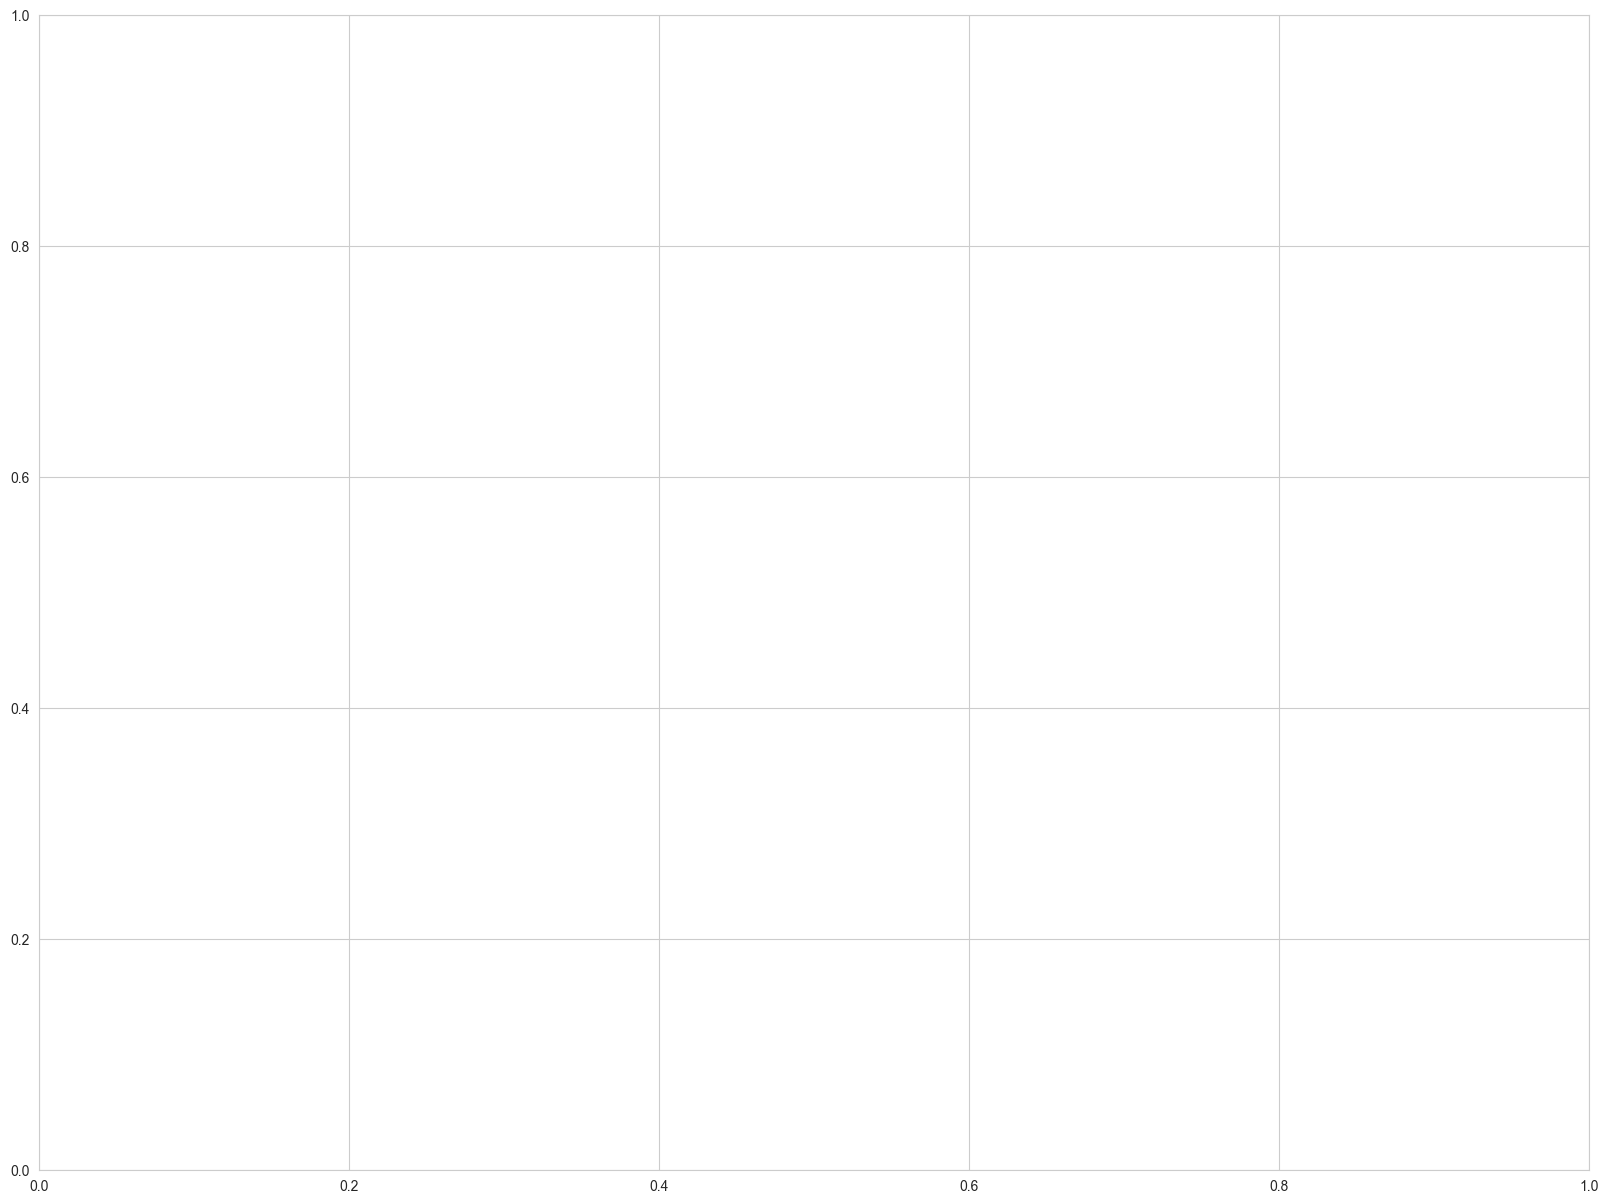

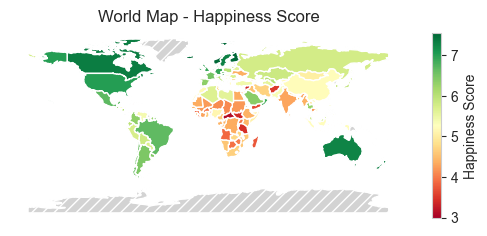

In [48]:
generate_world_map('Happiness Score')

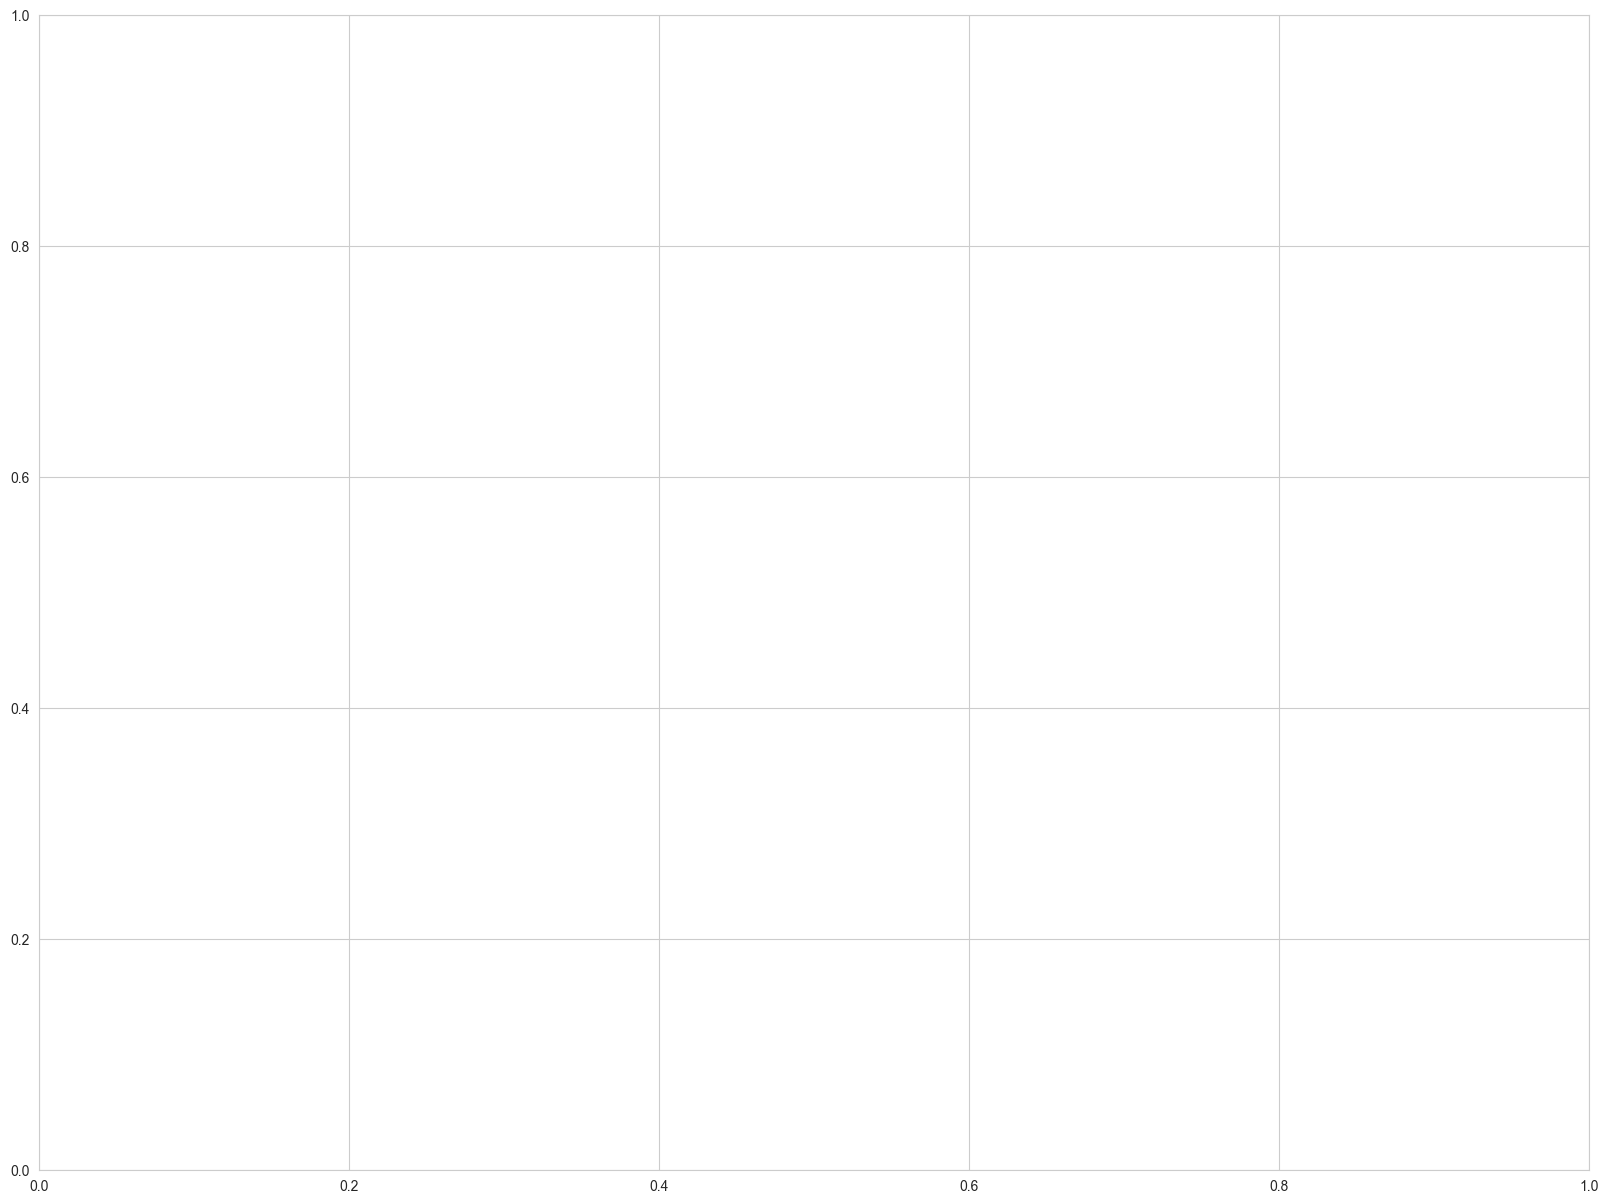

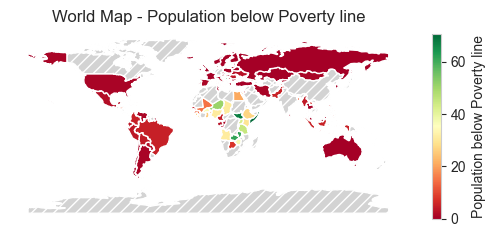

In [49]:
generate_world_map('Population below Poverty line')

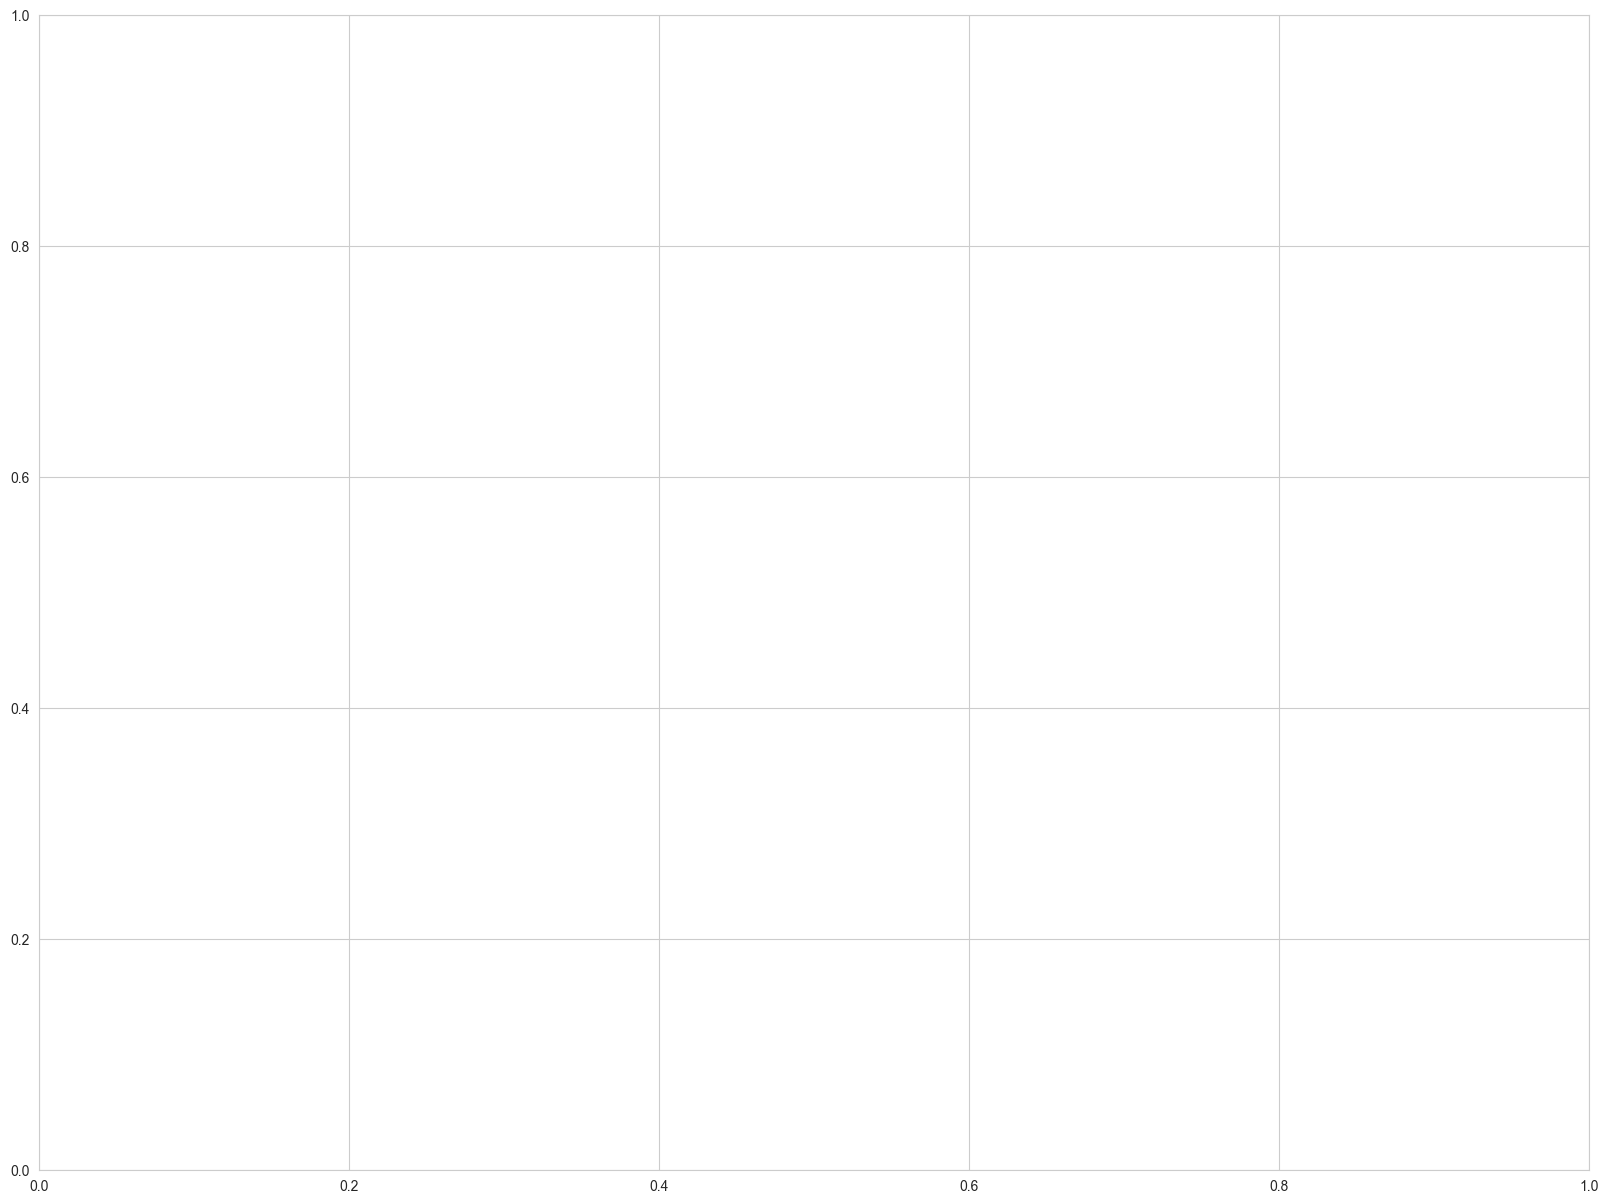

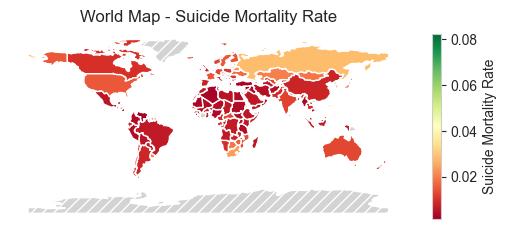

In [50]:
generate_world_map('Suicide Mortality Rate')

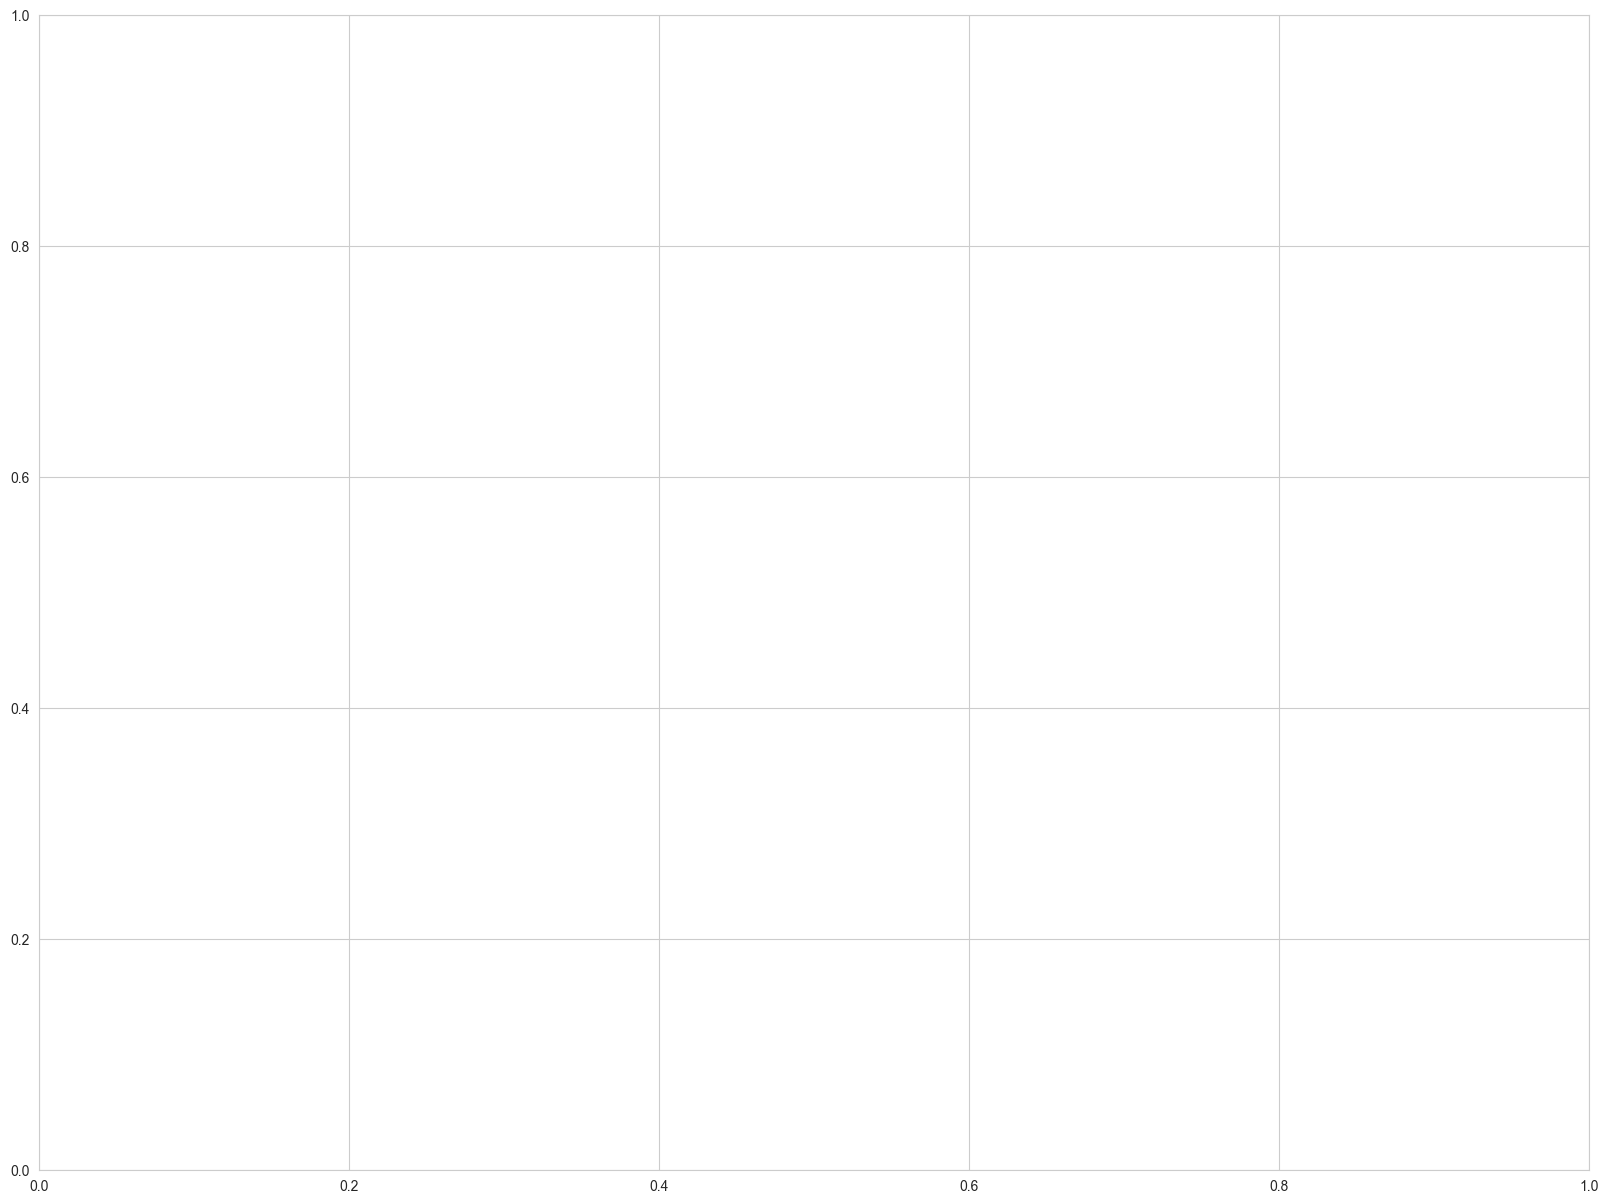

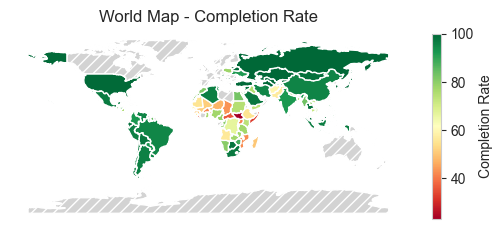

In [51]:
generate_world_map('Completion Rate')

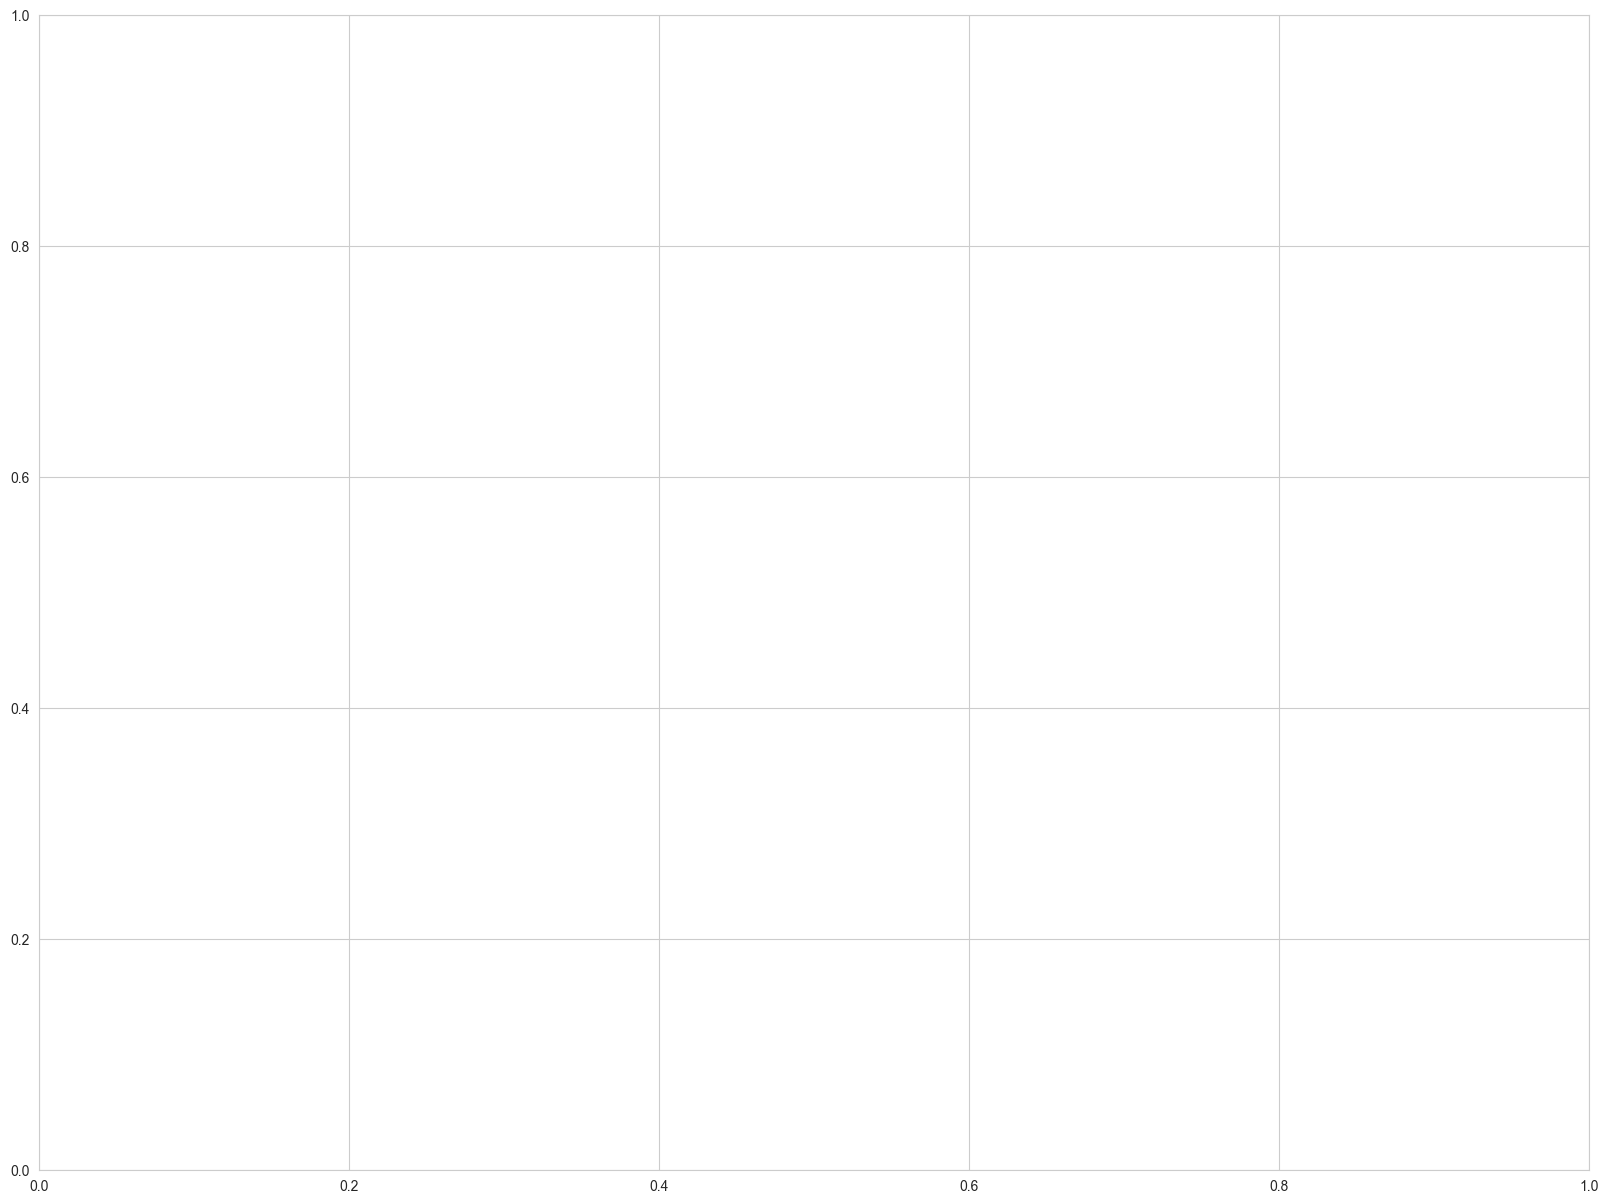

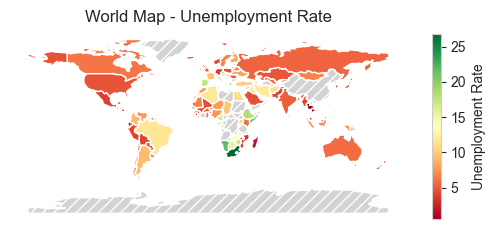

In [52]:
generate_world_map('Unemployment Rate')

# Regional examples: Bar plots

In [53]:
df_2019  = df[df['Year']==2019]
nan_entries_by_country = df_2019.set_index('Country').isna().sum(axis=1).sort_values()
countries = nan_entries_by_country[:5].index.tolist()

selected_countries_df = df[(df['Country'].isin(countries)) & (df['Year'] == 2019)]

In [54]:
selected_countries_df = selected_countries_df.dropna(axis=1)
selected_countries_df

,Country,Year,Happiness Rank,Happiness Score,GDP,Life expectancy,Corruption,"value, 1.1.1 Employed population below international poverty line (%), 15-24 years","value, 1.1.1 Employed population below international poverty line (%), 25+ years","value, 1.1.1 Employed population below international poverty line (%), Female","value, 1.1.1 Employed population below international poverty line (%), Male","value, 1.1.1 Employed population below international poverty line (%), average","value, 1.1.1 Employed population below international poverty line (%) - Female, 15-24 years","value, 1.1.1 Employed population below international poverty line (%) - Female, 25+ years","value, 1.1.1 Employed population below international poverty line (%) - Female, average","value, 1.1.1 Employed population below international poverty line (%) - Male, 15-24 years","value, 1.1.1 Employed population below international poverty line (%) - Male, 25+ years","value, 1.1.1 Employed population below international poverty line (%) - Male, average","value, 1.1.1 Population below international poverty line (%), 15-64 years","value, 1.1.1 Population below international poverty line (%), 65+ years","value, 1.1.1 Population below international poverty line (%), <15 years","value, 1.1.1 Population below international poverty line (%), Female","value, 1.1.1 Population below international poverty line (%), Male","value, 1.1.1 Population below international poverty line (%), Rural","value, 1.1.1 Population below international poverty line (%), Urban",Population below Poverty line,"value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), Female","value, 3.4.2 Suicide mortality rate (deaths per 100 000 population), Male",Suicide Mortality Rate,"value, 4.1.2 Completion rate (%), Lower secondary education",Completion Rate,"value, 4.1.2 Completion rate (%), Upper secondary education","value, 4.1.2 Completion rate (%) - Lower secondary education, Female","value, 4.1.2 Completion rate (%) - Lower secondary education, Male","value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 1 (poorest)","value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 2","value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 3","value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 4","value, 4.1.2 Completion rate (%) - Lower secondary education, Quintile 5 (richest)","value, 4.1.2 Completion rate (%) - Lower secondary education, Rural","value, 4.1.2 Completion rate (%) - Lower secondary education, Urban","value, 4.1.2 Completion rate (%) - Lower secondary education, average","value, 4.1.2 Completion rate (%) - Primary education, Female","value, 4.1.2 Completion rate (%) - Primary education, Male","value, 4.1.2 Completion rate (%) - Primary education, Quintile 1 (poorest)","value, 4.1.2 Completion rate (%) - Primary education, Quintile 2","value, 4.1.2 Completion rate (%) - Primary education, Quintile 3","value, 4.1.2 Completion rate (%) - Primary education, Quintile 4","value, 4.1.2 Completion rate (%) - Primary education, Quintile 5 (richest)","value, 4.1.2 Completion rate (%) - Primary education, Rural","value, 4.1.2 Completion rate (%) - Primary education, Urban","value, 4.1.2 Completion rate (%) - Primary education, average","value, 4.1.2 Completion rate (%) - Upper secondary education, Female","value, 4.1.2 Completion rate (%) - Upper secondary education, Male","value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 1 (poorest)","value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 2","value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 3","value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 4","value, 4.1.2 Completion rate (%) - Upper secondary education, Quintile 5 (richest)","value, 4.1.2 Completion rate (%) - Upper secondary education, Rural","value, 4.1.2 Completion rate (%) - Upper secondary education, Urban","value, 4.1.2 Completion rate (

In [55]:
def create_bar_plot(
    data: pd.DataFrame,
    value_name: [str], 
    title: [str]
):
    """
    Create a bar plot with annotated values.
    """
    melted_data = pd.melt(
        data, 
        id_vars=['Country', 'Year'], 
        value_vars=data.columns[2:], 
        var_name='Population Group', 
        value_name=value_name
    )

    # Bar plot
    plt.figure(figsize=(16, 10))
    ax = sns.barplot(x='Country', y=value_name, hue='Population Group', data=melted_data, errorbar=None, palette='viridis')

    # Add values on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

    plt.title(title, fontweight="bold")
    plt.xticks(rotation=45, ha='right')

    plt.savefig(f"../fig/bar_plot_{title}.png", format='png', dpi=800, bbox_inches='tight')
    plt.show()

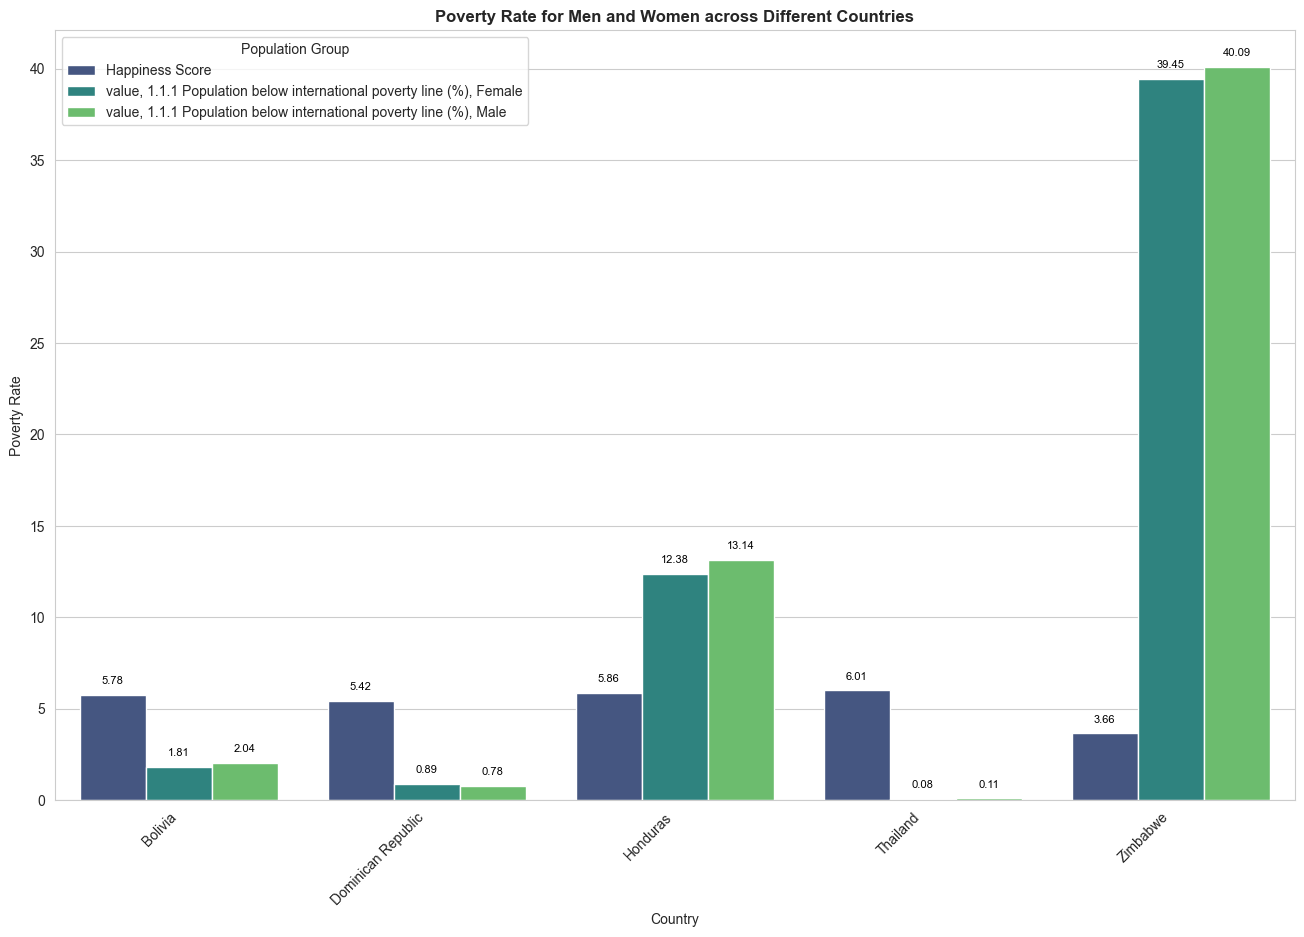

In [56]:
poverty_columns = selected_countries_df.iloc[:, [0, 1, 3, 21, 22]]

create_bar_plot(poverty_columns, 'Poverty Rate', 'Poverty Rate for Men and Women across Different Countries')

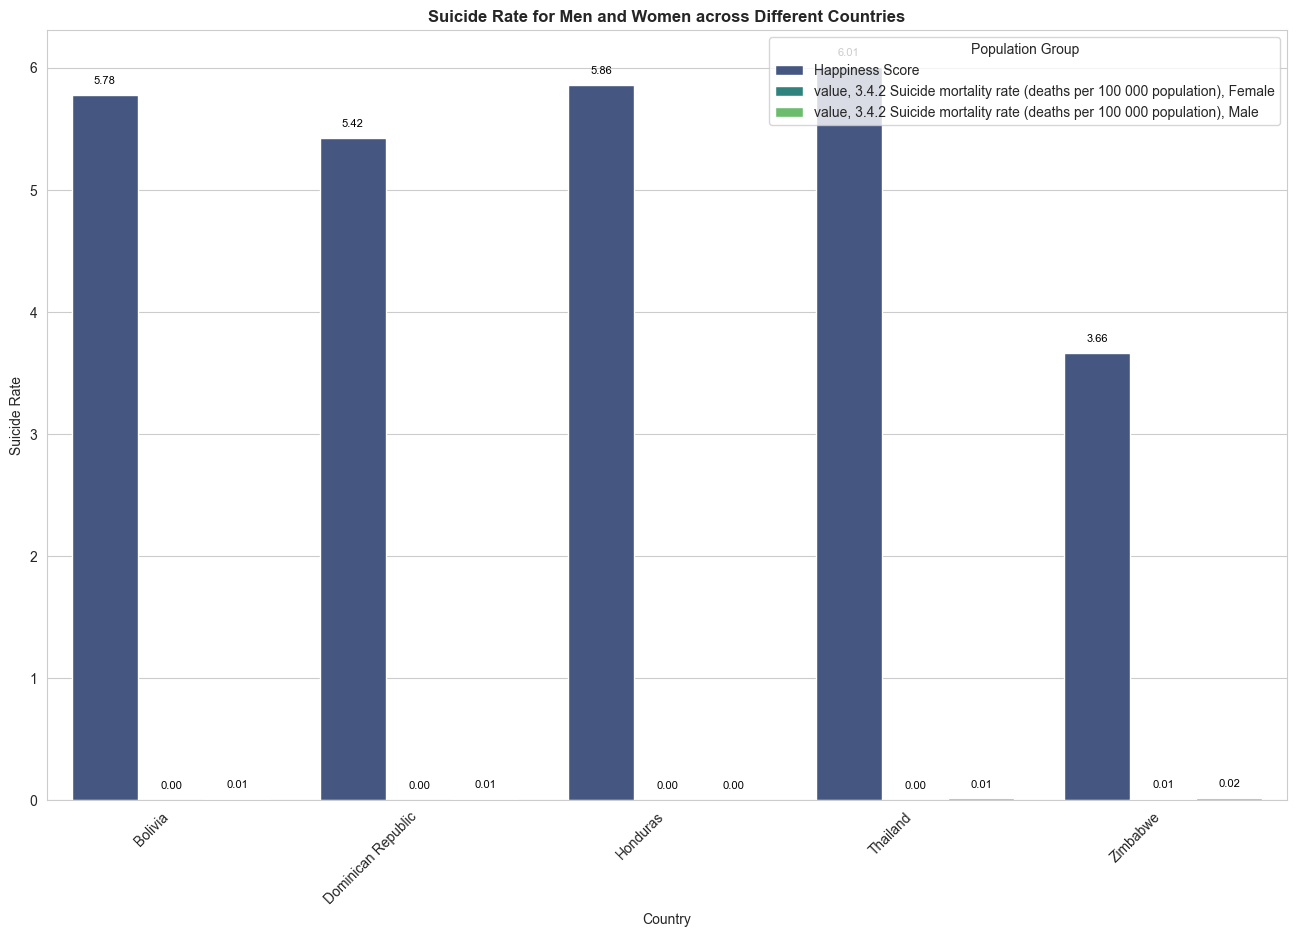

In [57]:
mortality_columns = selected_countries_df.iloc[:, [0, 1, 3, 26, 27]]
create_bar_plot(mortality_columns, 'Suicide Rate', 'Suicide Rate for Men and Women across Different Countries')

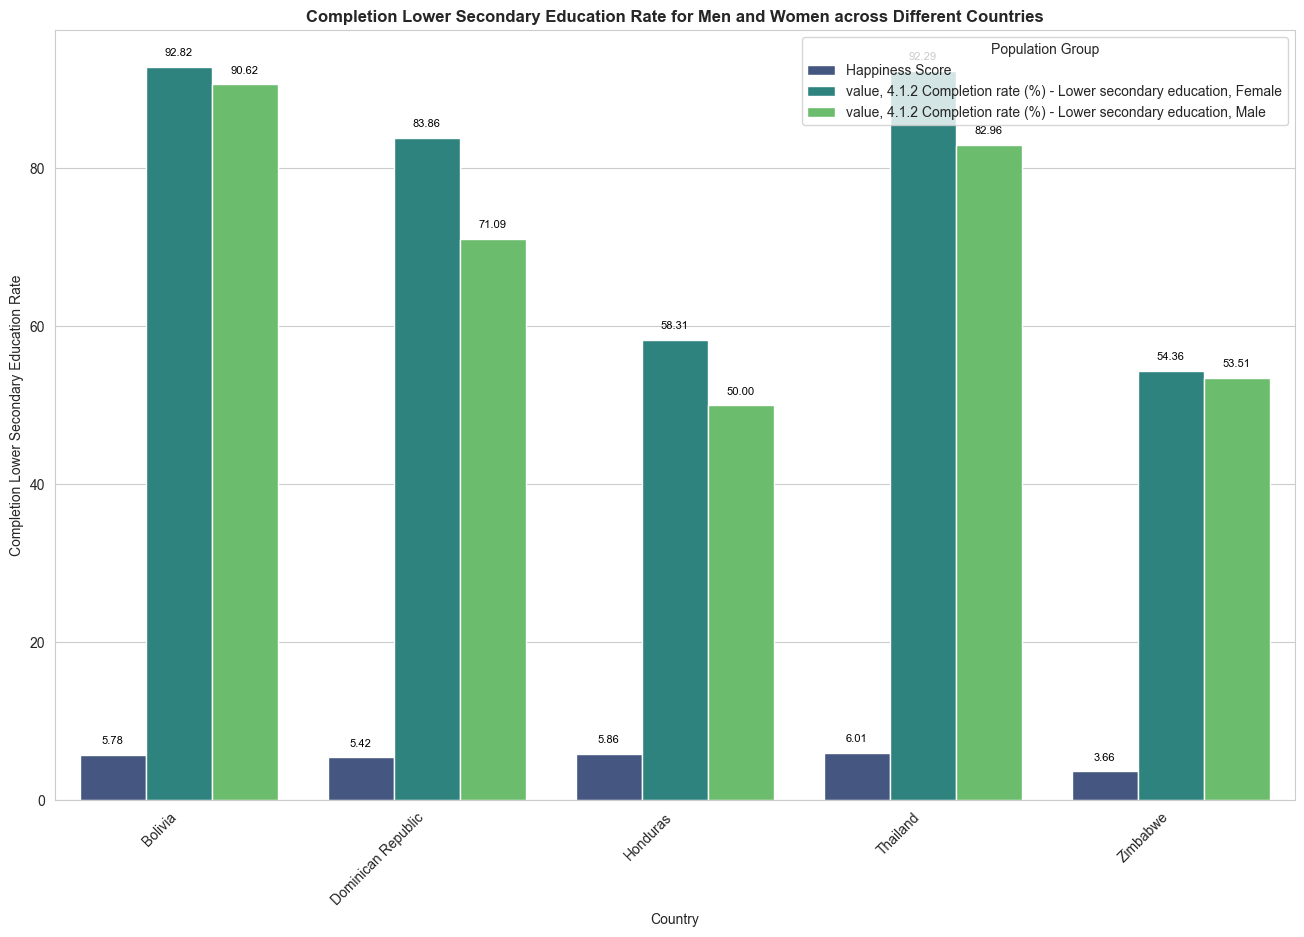

In [58]:
lower_education_columns = selected_countries_df.iloc[:, [0, 1, 3, 32, 33]]

create_bar_plot(lower_education_columns, 'Completion Lower Secondary Education Rate', 'Completion Lower Secondary Education Rate for Men and Women across Different Countries')

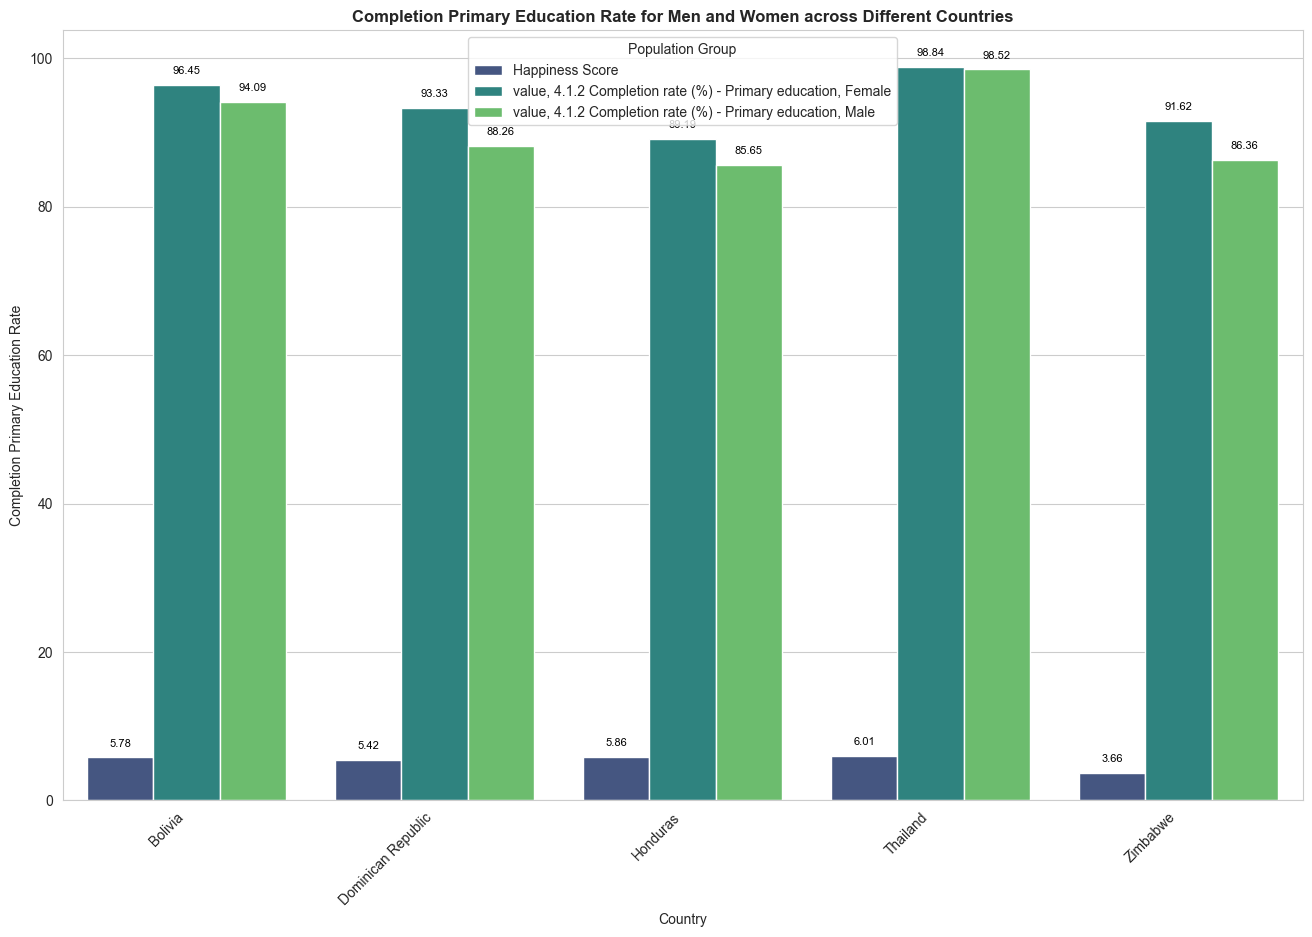

In [59]:
primary_education_columns = selected_countries_df.iloc[:, [0, 1, 3, 42, 43]]

create_bar_plot(primary_education_columns, 'Completion Primary Education Rate', 'Completion Primary Education Rate for Men and Women across Different Countries')

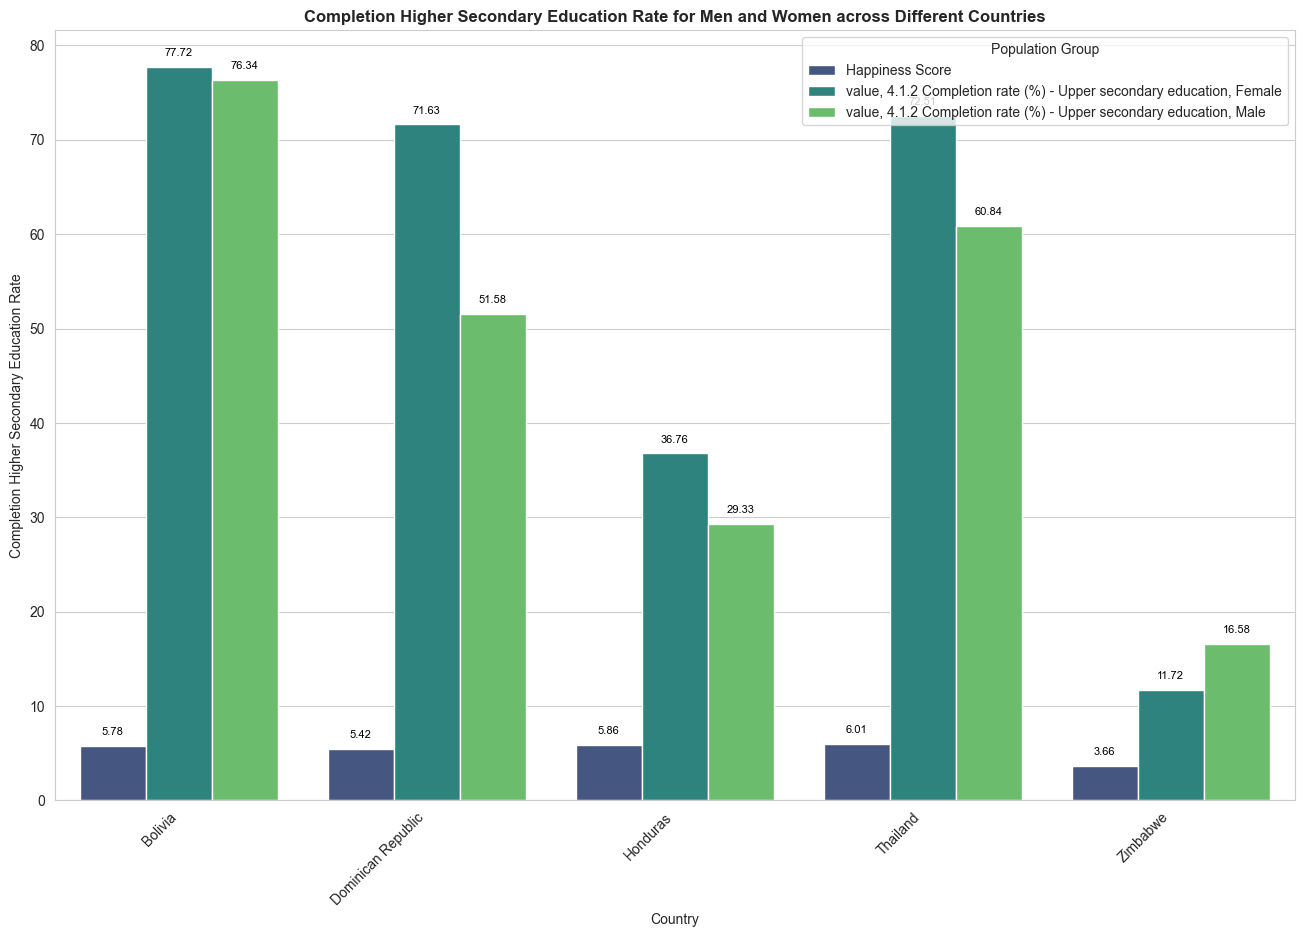

In [60]:
higher_education_columns = selected_countries_df.iloc[:, [0, 1, 3, 52, 53]]

create_bar_plot(higher_education_columns, 'Completion Higher Secondary Education Rate', 'Completion Higher Secondary Education Rate for Men and Women across Different Countries')

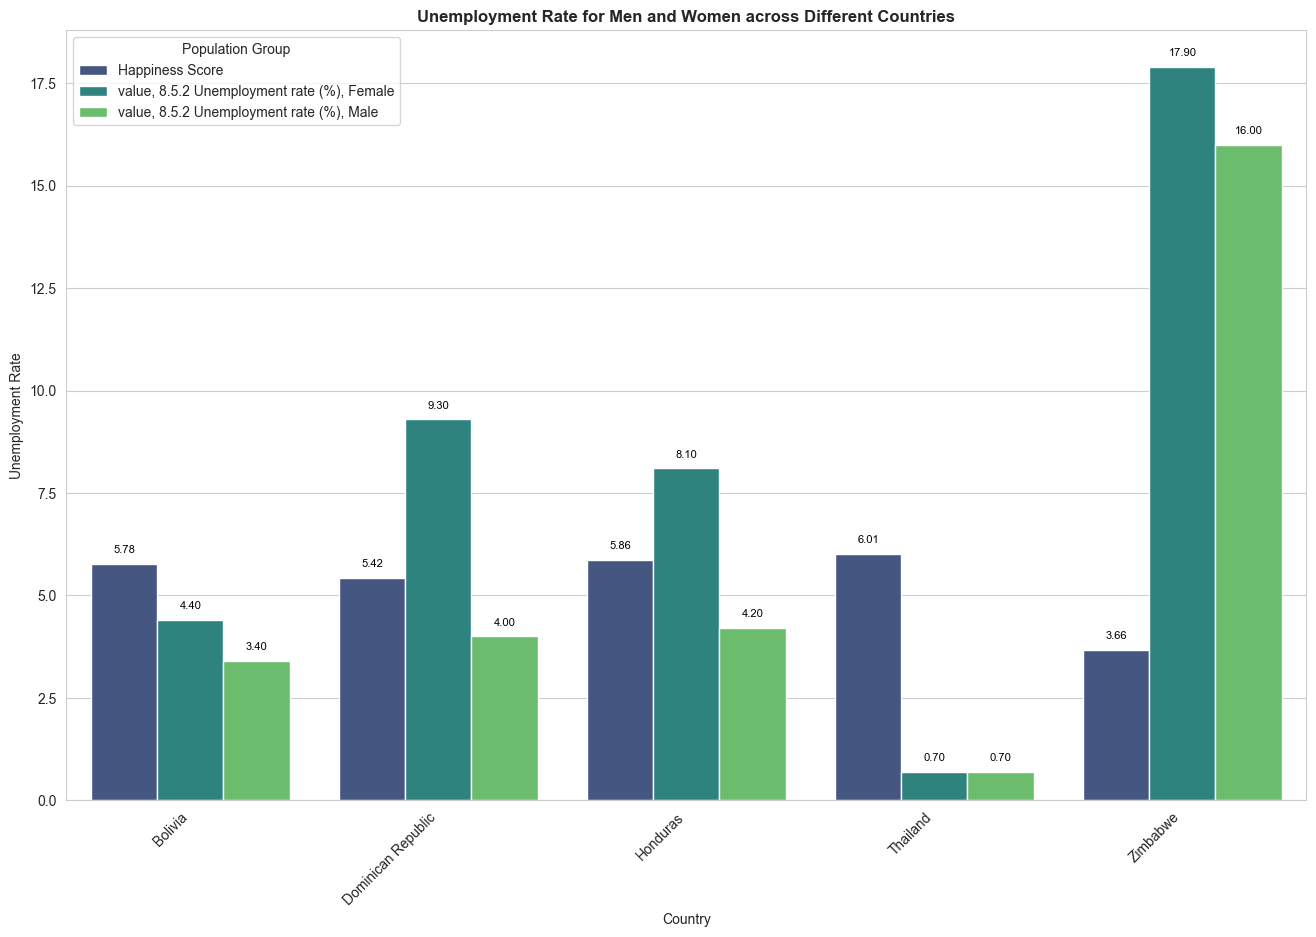

In [61]:
unemployment_columns = selected_countries_df.iloc[:, [0, 1, 3, 64, 65]]

create_bar_plot(unemployment_columns, 'Unemployment Rate', 'Unemployment Rate for Men and Women across Different Countries')